# Car Price Prediction using Machine Learning 

#### Machine learning enables the prediction of car prices by analyzing features such as horsepower and other specifications. These insights can help new car manufacturers understand market trends and make data-driven investment decisions.

# The Data Source:
#### In this project, I have used a Kaggle car dataset to explore price variations across different brands, from high-end cars like Bugatti to more affordable ones like Toyota and Ford. The process includes data analysis, visualization, and applying multiple machine learning models to find the most effective one for predicting car prices.
#### The data was downloaded from https://www.kaggle.com/datasets/CooperUnion/cardataset/data

## Regression model Metrics:
### Mean Squared Error (MSE)
##### Measures the average of the squared differences between actual and predicted values.Lower values indicate better model performance.
### Mean Absolute Error (MAE)
##### Measures the average of the absolute differences between actual and predicted values.Lower MAE means better prediction accuracy.
### R-squared (R² or Coefficient of Determination)
##### Indicates how well the model explains the variability of the target variable.1 means perfect prediction, 0 means no predictive power



## Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 

## Load the dataset using pd.read_csv() and display the first few rows using head()

In [2]:
df = pd.read_csv("data.csv")

### Understand the Structure of the Dataset
### Check the shape of the dataset with df.shape

In [3]:
df.shape

(11914, 16)

### To display the top 5 rows 

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### To display the last 5 rows 

In [11]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### View column names and data types using .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Check for Missing Values

In [5]:
# Use .isnull().sum() to identify missing or null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Some features like 'Engine Fuel Type' "Number of Doors", and 'Engine HP' have missing values. Since most machine learning models can’t work with missing data, we need to fill these gaps before using the data for modeling.

### Now calculate the median values of 'Number of doors' so that we can fill the missing values with the median value.

In [6]:
df["Number of Doors"].median()

4.0

### Now we can fill the missing values with the value 4 which is the median of the number of doors.

In [7]:
df["Number of Doors"].fillna(4, inplace= True)

### Now check again the missing values of 'Number of doors'

In [8]:
df["Number of Doors"].isnull().sum()

0

We see that there are 0 missing values present.

In [9]:
df["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [10]:
type("df['Engine Fuel Type'].mode()")

str

In [11]:
df['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [12]:

df['Engine Fuel Type'].isnull().sum()

0

In [13]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [14]:
df["Engine HP"].mean()

249.38607007176023

In [15]:
df["Engine HP"].median()

227.0

#### We will fill the missing values with the median value so that it is more appropriate and accurate. And we have to make sure that inplace = True which means that the values that are replaced are permanent rather than getting temporary solutions in a variable.

In [16]:
df["Engine HP"].fillna(227, inplace= True)

In [17]:
df["Engine HP"].isnull().sum()

0

In [18]:
df["Engine Cylinders"].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [19]:
df['Engine Cylinders'].fillna(4, inplace = True)

In [20]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Now I will drop the 'Market Category' feature and making the inplace = True which shows that the feature is removed.

In [21]:
df.drop(["Market Category"], inplace= True, axis= 1)

Now again check the missing values and see if there are any missing values in the data

In [22]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


We examine the dataset to understand the types of features we'll be working with in our machine learning model. We notice that some features are of type object, which need to be converted into numerical (mathematical) form so that machine learning algorithms can process and interpret them properly.

In [24]:
df["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

### We checked the unique values of 'Vehicle Size' and found that it has three categories: 'Compact', 'Midsize', and 'Large'.

In [25]:
df["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

#### We examined the 'Vehicle Style' feature and found many categories. These need to be understood and converted into numerical form before they can be used in a machine learning model.

### Use .describe() to get statistical summaries (mean, median, std, min, max) for numerical features.

In [26]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.256421,5.624727,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.888444,1.780189,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Exploratory data analysis uisng Countplots
### Countplots, created using the Seaborn library in Python, help visualize the number of occurrences for each category within a feature. They provide a clear view of the distribution of data across different categories, making it easier to understand class balance and overall data composition. Viewing these plots helps in gaining familiarity with the dataset and identifying the number of classes in various features.

### Countplot of different car companies

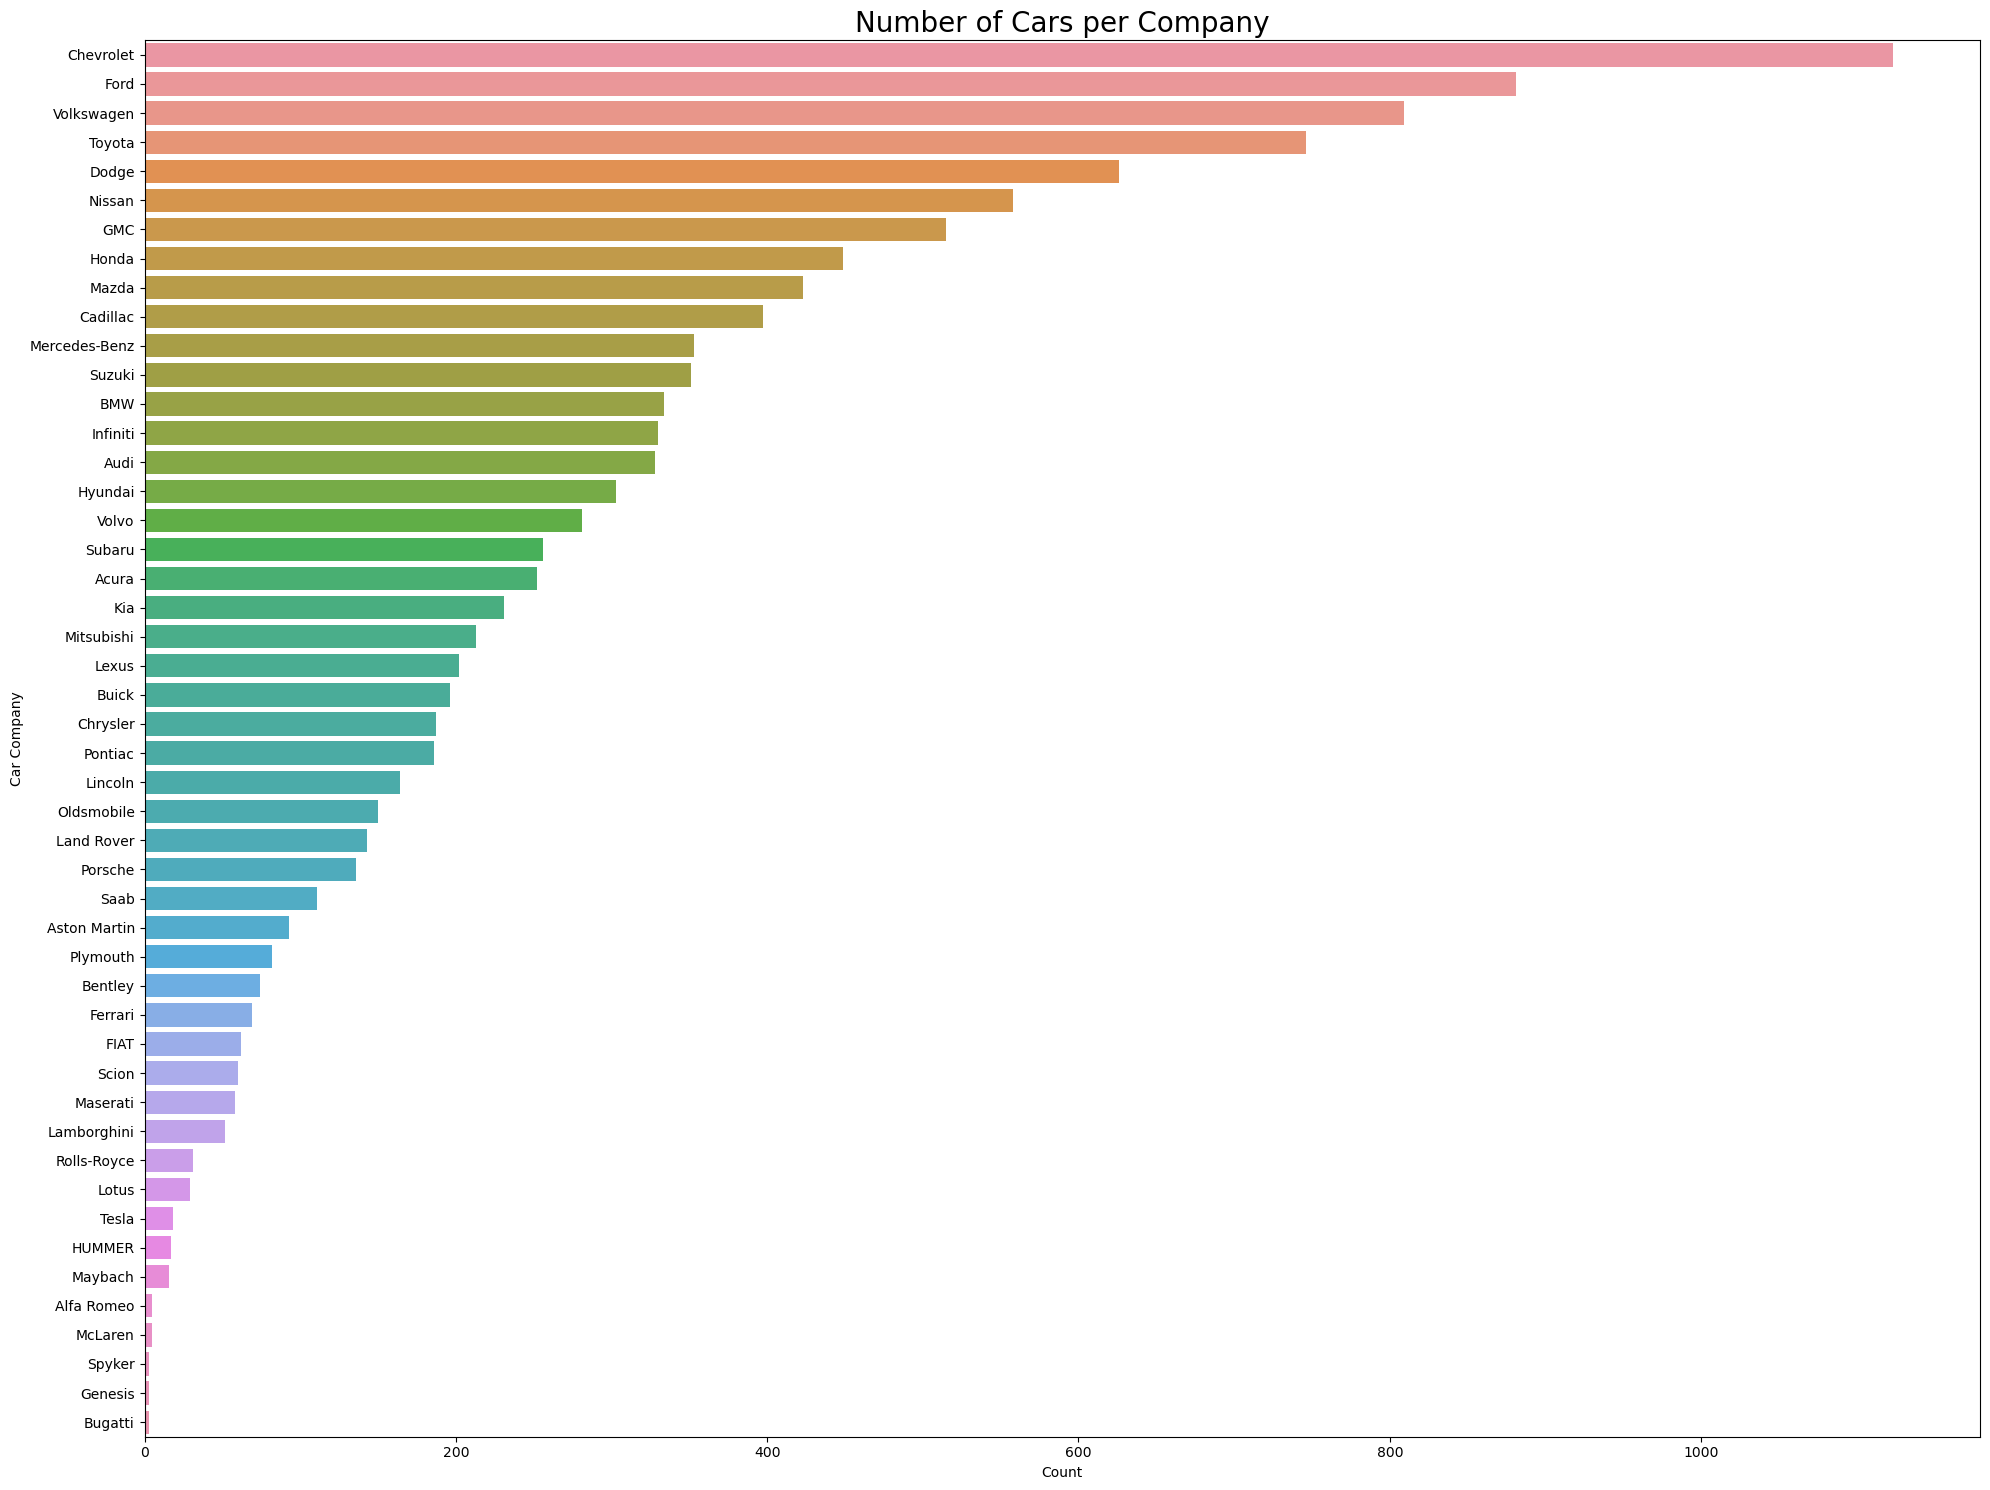

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
ax = sns.countplot(data=df, y='Make', order=df['Make'].value_counts().index)
ax.set_title("Number of Cars per Company", fontsize=20)
ax.set_xlabel("Count")
ax.set_ylabel("Car Company")
plt.tight_layout()
plt.show()

### Using Seaborn’s countplot, we analyzed the number of cars per company in the dataset. The plot shows that Chevrolet has the highest count with over 1000 cars, while companies like Bugatti and Genesis have very few entries. This reflects real-world trends, where luxury brands have fewer models. Overall, the countplot helps us understand the distribution of car data across different manufacturers.

## Countplot of the total cars per different years

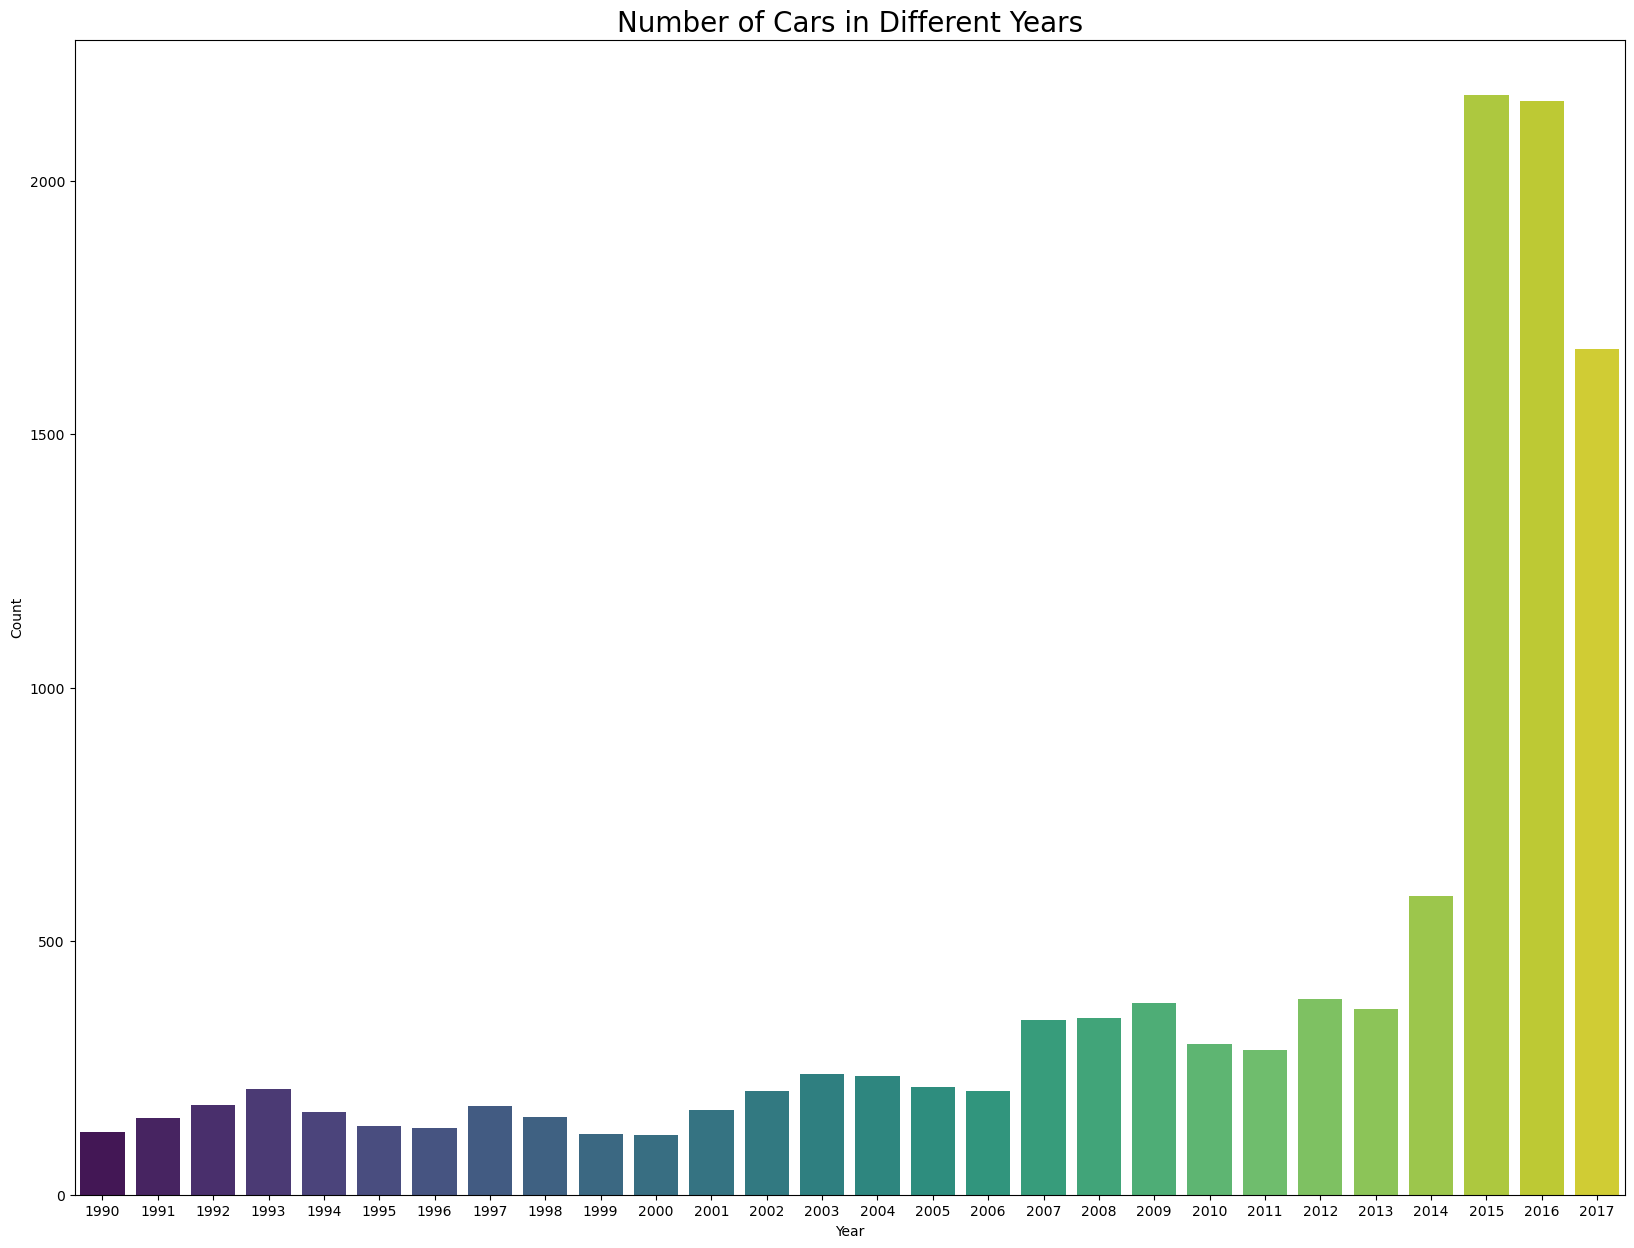

In [28]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title("Number of Cars in Different Years", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### This dataset contains car data from 1990 to 2017. From 1990 to 2013, the total number of cars each year was less than 500. However, in 2015 and 2016, the number of cars exceeded 2,000, while in 2017, it dropped to around 1,600.

## Counting the cars based on transmission type

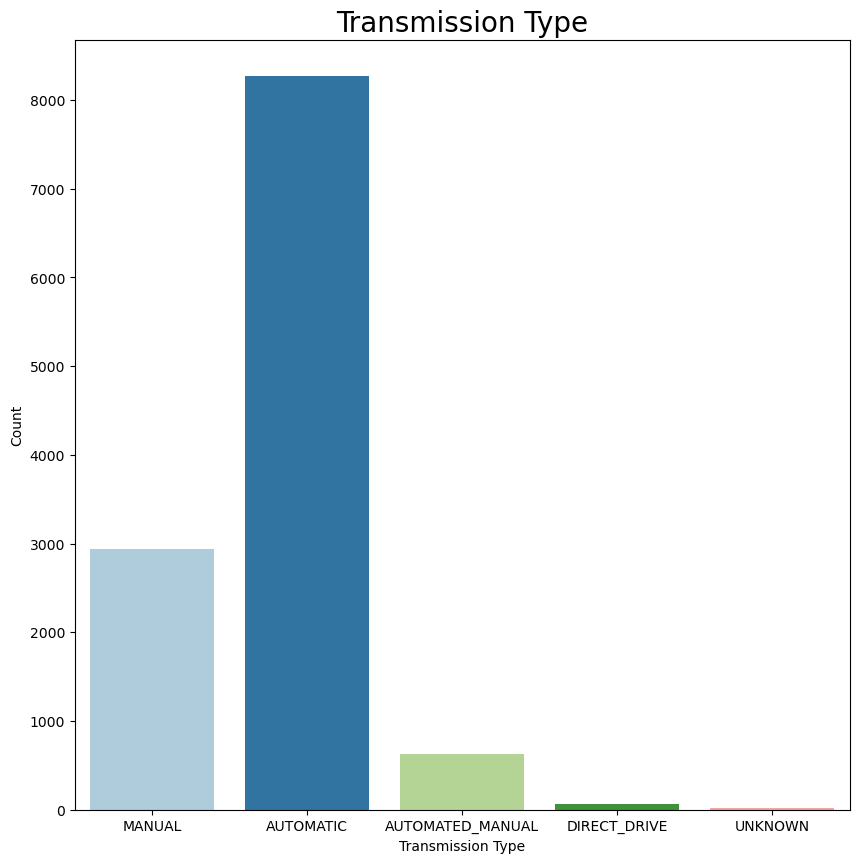

In [29]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Transmission Type', palette='Paired')
plt.title("Transmission Type", fontsize=20)
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

### Most cars in the dataset are automatic, reflecting their ease of use and growing popularity. Manual cars are becoming less common as they are increasingly replaced by automatic ones. A small portion of cars are automatic-manual hybrids, but overall, automatic transmissions dominate the dataset.

## Countplot of Engine Fuel Type

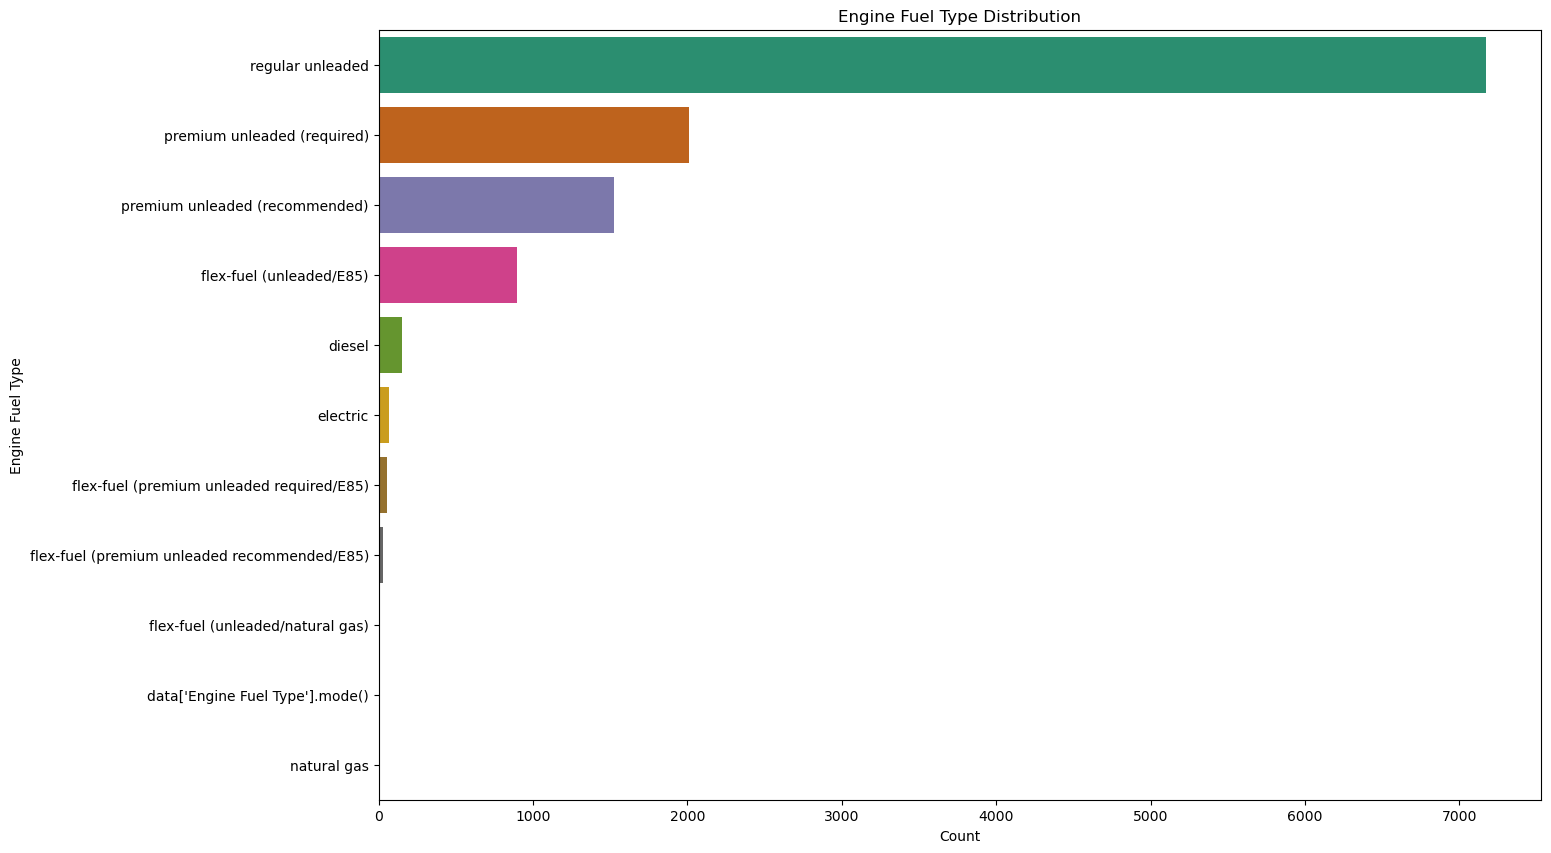

In [30]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='Engine Fuel Type', palette='Dark2', order=df['Engine Fuel Type'].value_counts().index)
plt.title("Engine Fuel Type Distribution")
plt.xlabel("Count")
plt.ylabel("Engine Fuel Type")
plt.show()

### The majority of cars in the dataset use 'regular unleaded' fuel. Other notable categories include 'premium unleaded (required)' and 'premium unleaded (recommended)'. Electric cars are present but in small numbers, reflecting their relatively low prevalence in real life.


## Countplot of Vehicle Size

<Axes: xlabel='Vehicle Size', ylabel='count'>

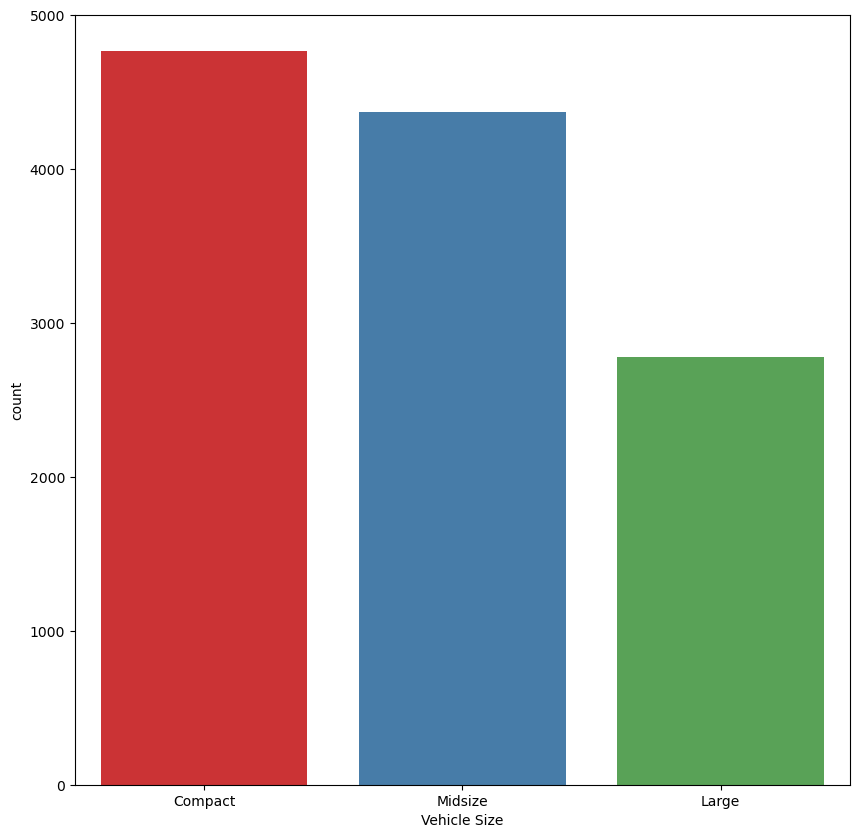

In [31]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = df, palette = 'Set1')

### The dataset primarily consists of compact cars, followed by midsize vehicles, with only a few large cars. This aligns with real-world trends, where compact and midsize cars are more common than large ones.

# Heatmap

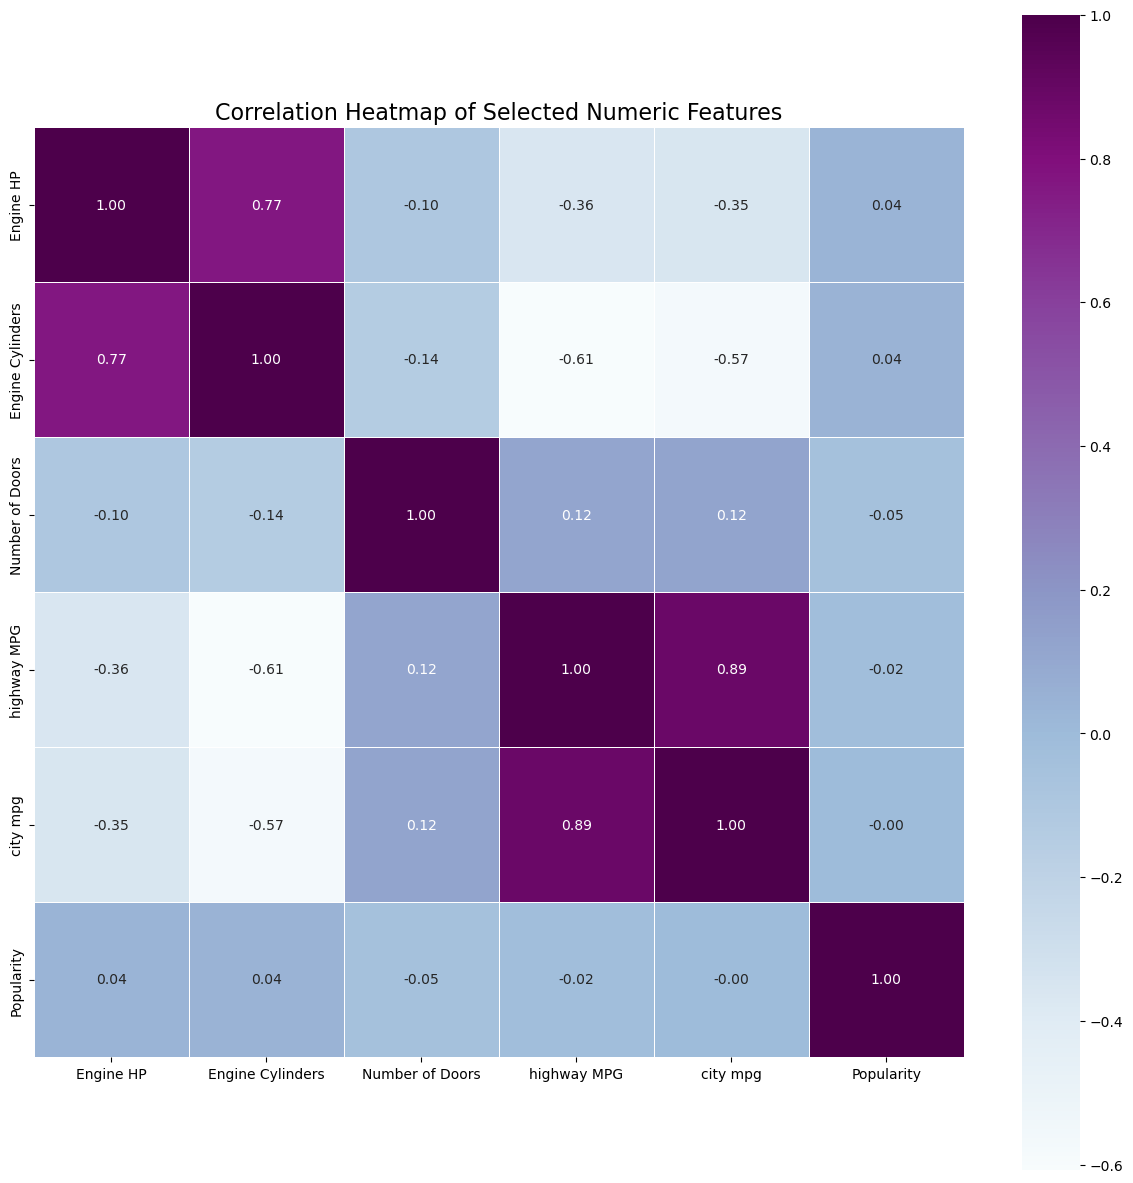

In [32]:
# Select numeric columns for correlation
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
corr_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Selected Numeric Features", fontsize=16)
plt.show()

### A heatmap was used to visualize correlations between numerical features such as 'Engine HP', 'Engine Cylinders', and 'Number of Doors'. The analysis showed a strong correlation (≈0.89) between 'highway MPG' and 'city MPG'. Additionally, 'Engine HP' and 'Engine Cylinders' were positively correlated, which makes sense since more cylinders generally result in higher horsepower.

## Groupby with 'Make' feature

In [26]:
columns_to_aggregate = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']
aggregated_data = df.groupby('Make')[columns_to_aggregate].agg(['min', 'max', 'mean'])
aggregated_data

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.865539              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   227.0   147.596774              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   242.860386              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.888641              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   207.264069              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   282.085366              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   349.832861              0.0  12.0   
Mitsubishi         66.0   320.0   173.680751              3.0   8.0   
Nissan             90.0   600.0   239.689964              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla             227.0   227.0   227.000000              0.0   0.0   
Toyota             93.0   381.0   236.123324              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

### The dataset was grouped by the 'Make' feature to analyze key performance metrics such as 'Engine HP', 'Engine Cylinders', 'highway MPG', and 'city mpg'. Using the groupby function, the minimum, maximum, and mean values were calculated for each make, providing a clear summary of engine and fuel efficiency characteristics across different car brands.

## Grouping the data on the basis of year and check the average prices of cars for the years of cars

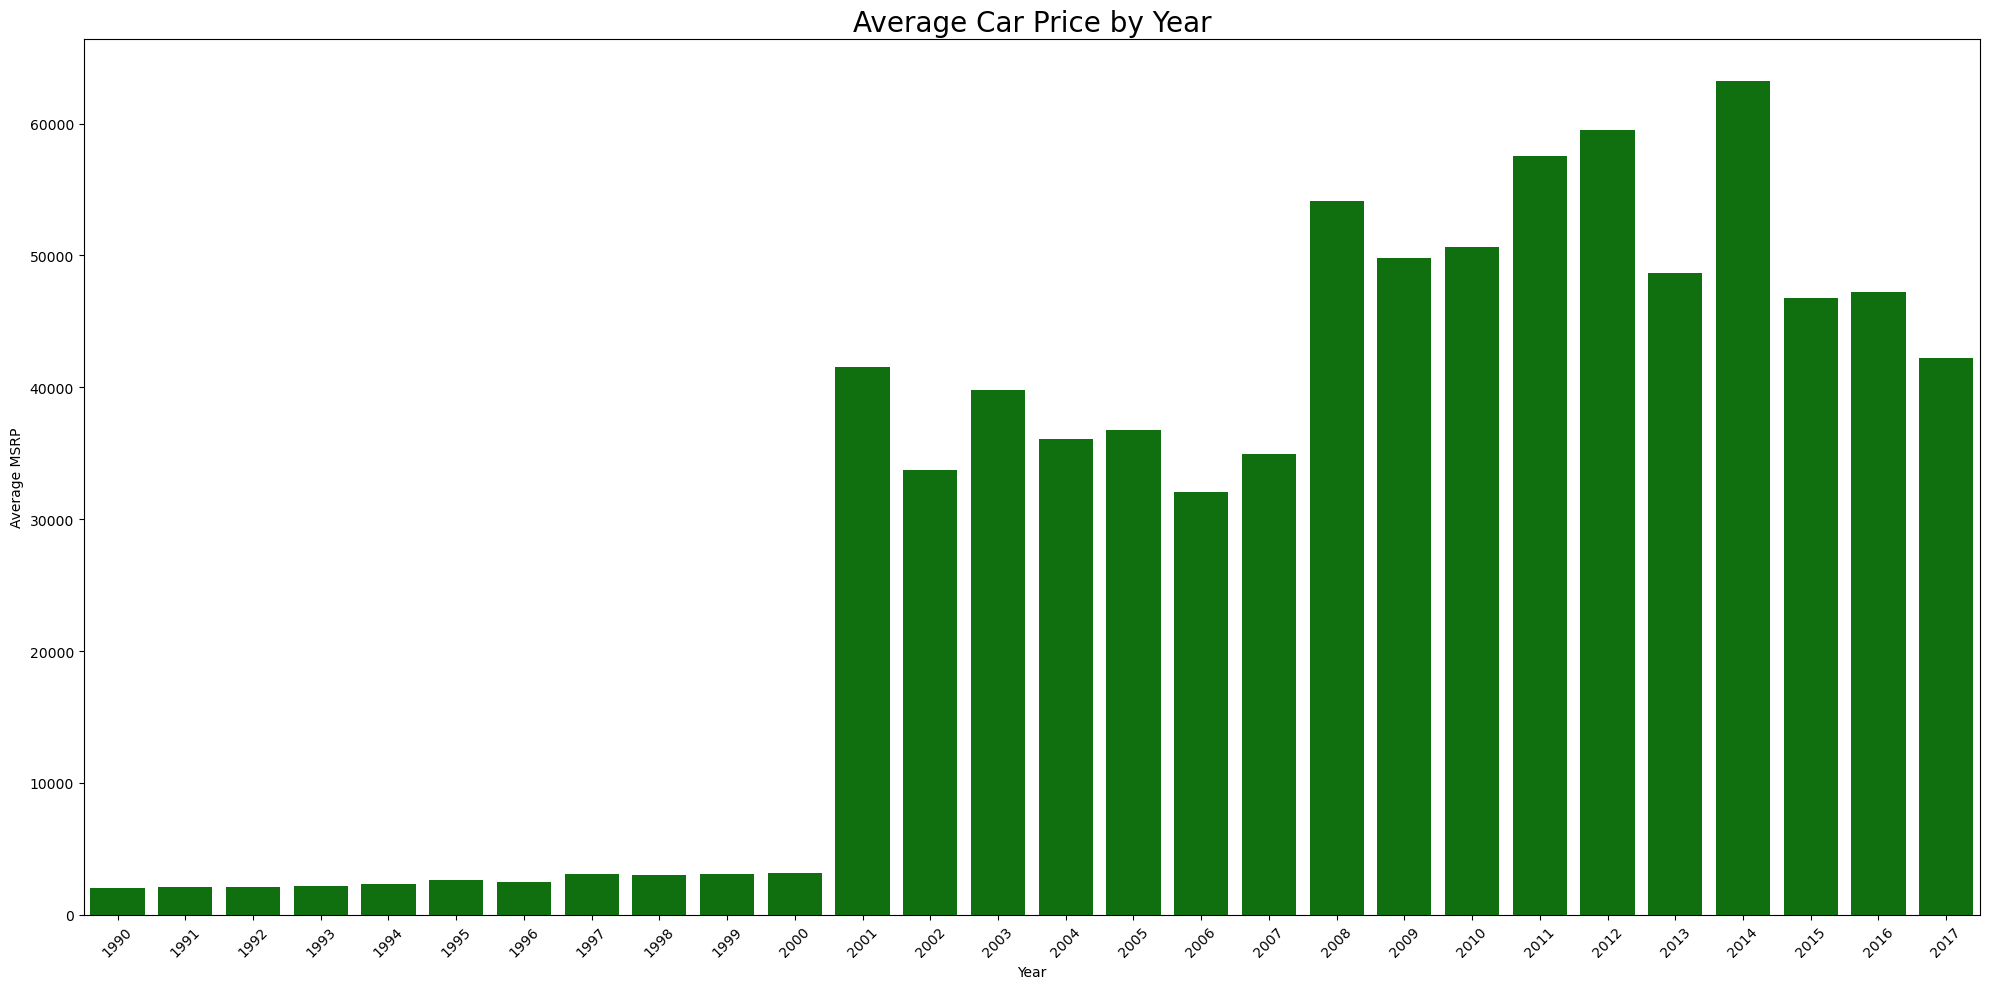

In [34]:
# Prepare average MSRP per year
avg_price_per_year = df.groupby('Year')['MSRP'].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(data=avg_price_per_year, x='Year', y='MSRP', color='green')

plt.title("Average Car Price by Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Average MSRP")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  The data was grouped by year to observe the average car prices over time. The plot shows that average prices peaked in 2014, followed by 2012. Cars from 2000 and earlier had significantly lower average prices. Overall, there’s a general upward trend in average car prices with newer model years, though the increase is not strictly consistent.

## Grouping on the basis of Transmission Type

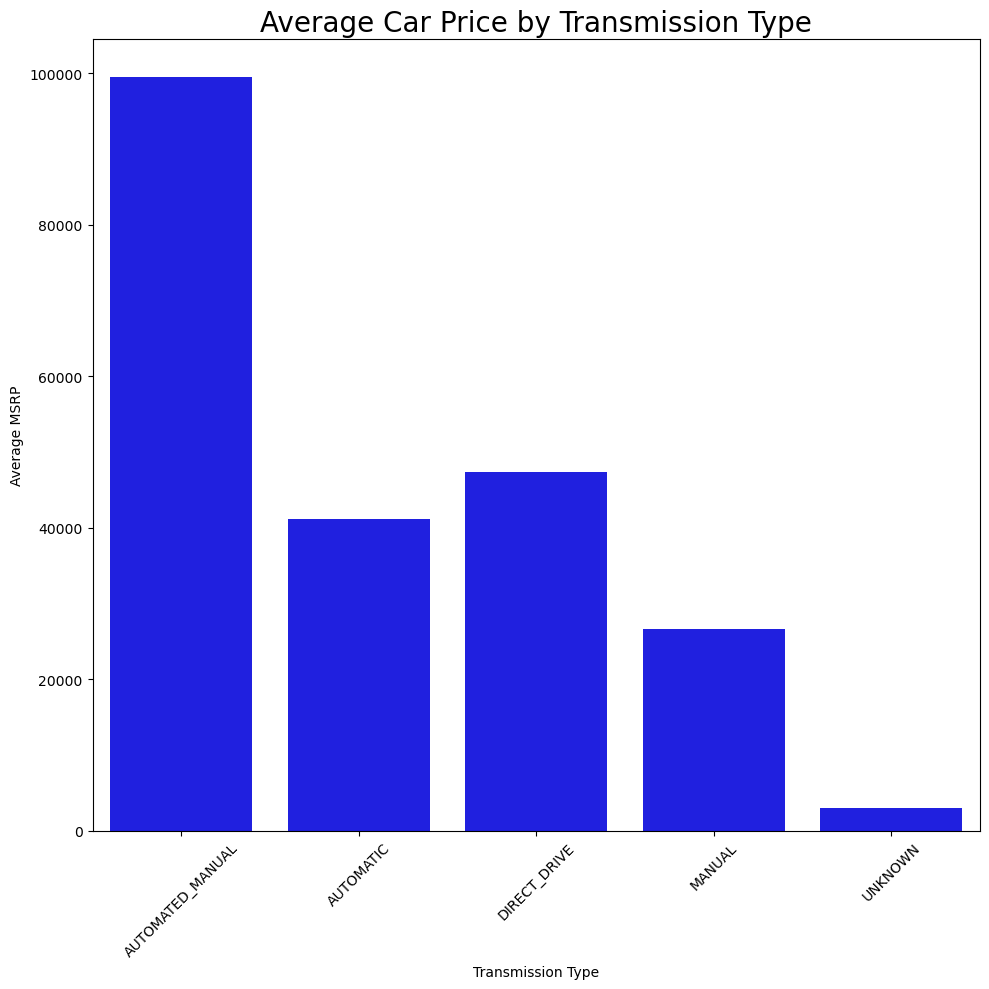

In [35]:
# Prepare data
avg_price_by_transmission = df.groupby('Transmission Type')['MSRP'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(data=avg_price_by_transmission, x='Transmission Type', y='MSRP', color='blue')

plt.title("Average Car Price by Transmission Type", fontsize=20)
plt.xlabel("Transmission Type")
plt.ylabel("Average MSRP")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The data was grouped by transmission type to analyze average car prices. Automated_manual cars have the highest average price, followed by automatic cars. As expected, manual cars have lower average prices compared to automatic cars. This trend is clearly shown in the graph.

## Grouping on the basis of Make with 'MSRP' values

C:\Users\farha\AppData\Local\Temp\ipykernel_4184\3943818037.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Make']).mean()['MSRP'].sort_values(ascending=False).plot(kind='bar', fontsize=15, color='blue')


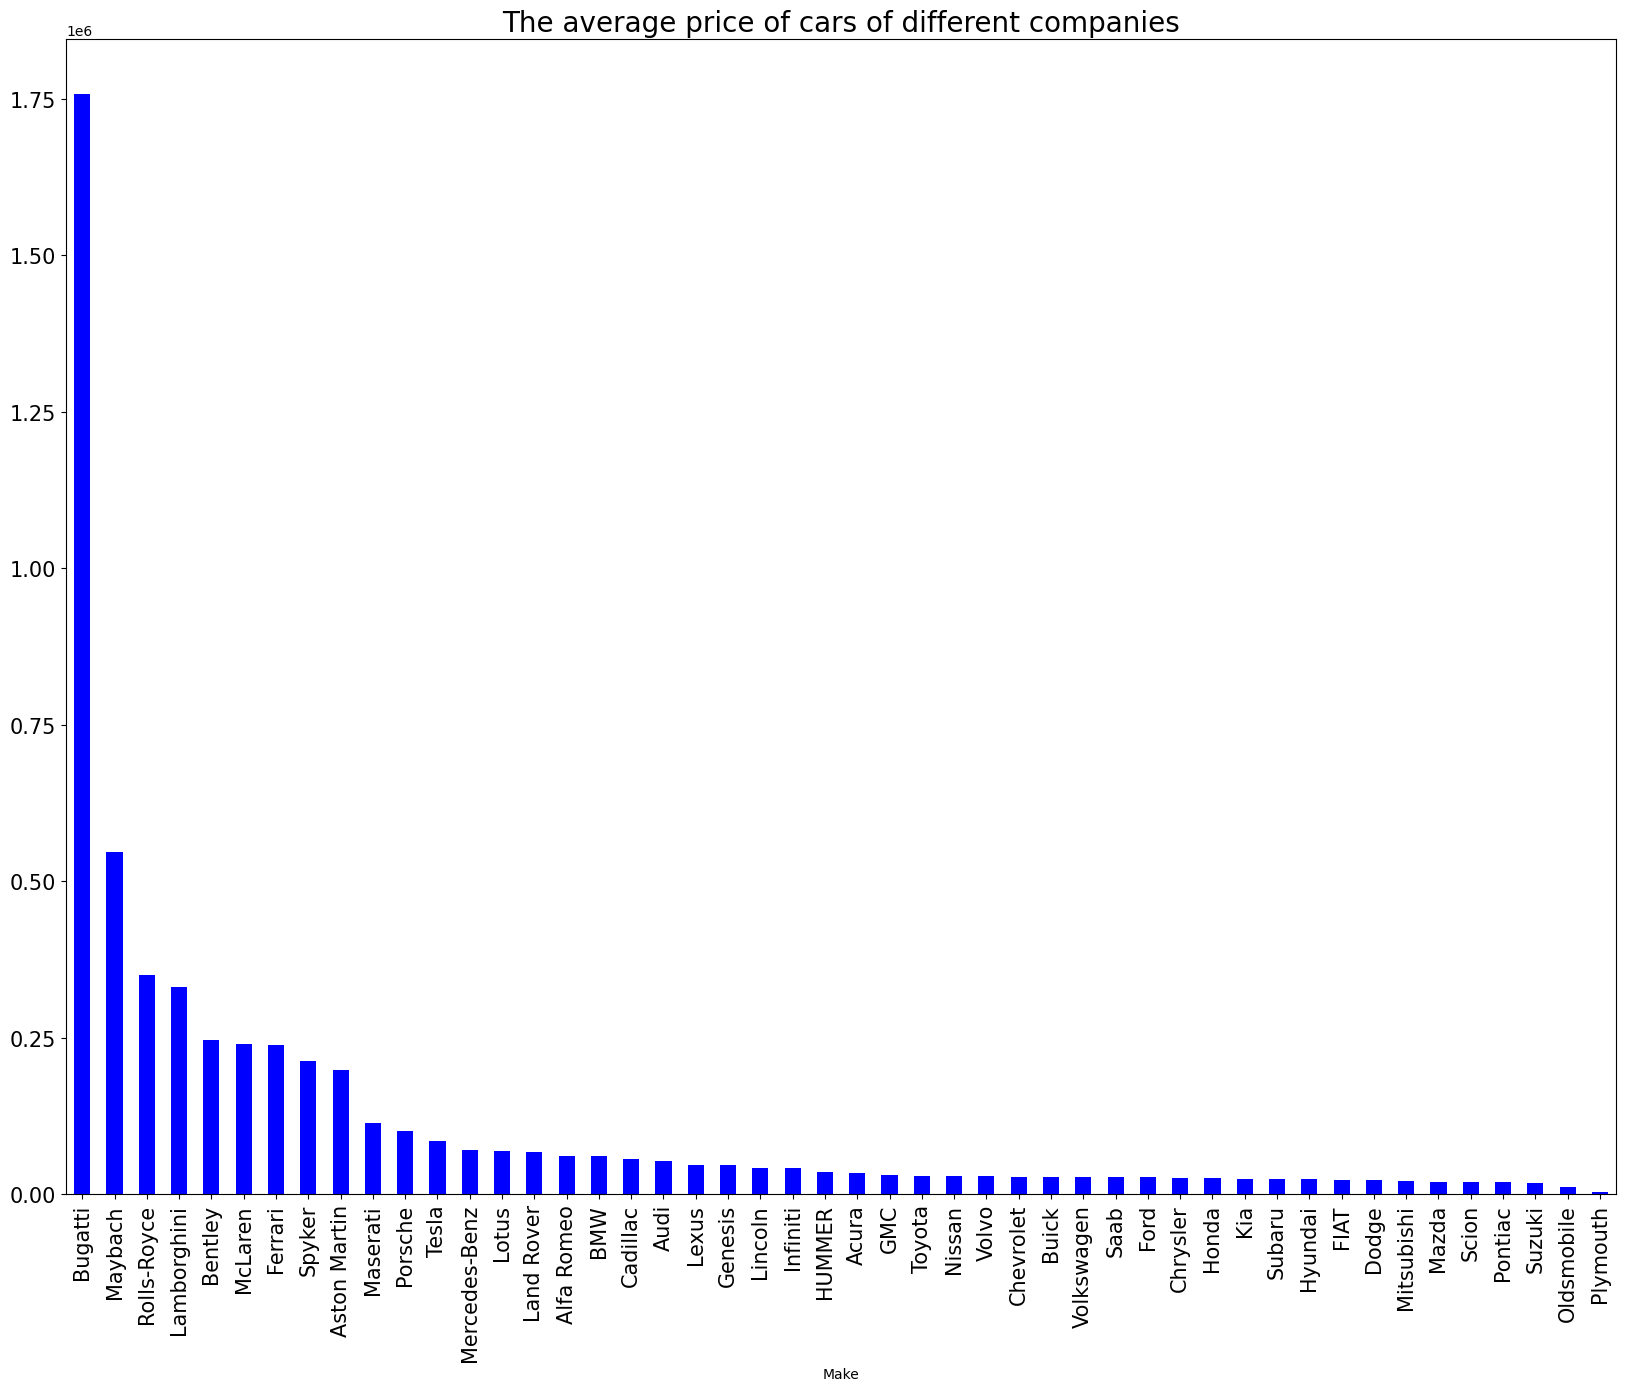

In [36]:
plt.figure(figsize=(20, 15))
df.groupby(['Make']).mean()['MSRP'].sort_values(ascending=False).plot(kind='bar', fontsize=15, color='blue')
plt.title("The average price of cars of different companies", fontsize=20)
plt.show()

### We grouped the data by car make to examine average prices. Bugatti, known as the most expensive car brand, has an average price of about 1.75 million dollars, far exceeding other brands. Excluding Bugatti, Maybach and Rolls-Royce are among the most expensive. Plymouth has the lowest average car price.

## Grouping on the basis of Make with 'Engine HP' values

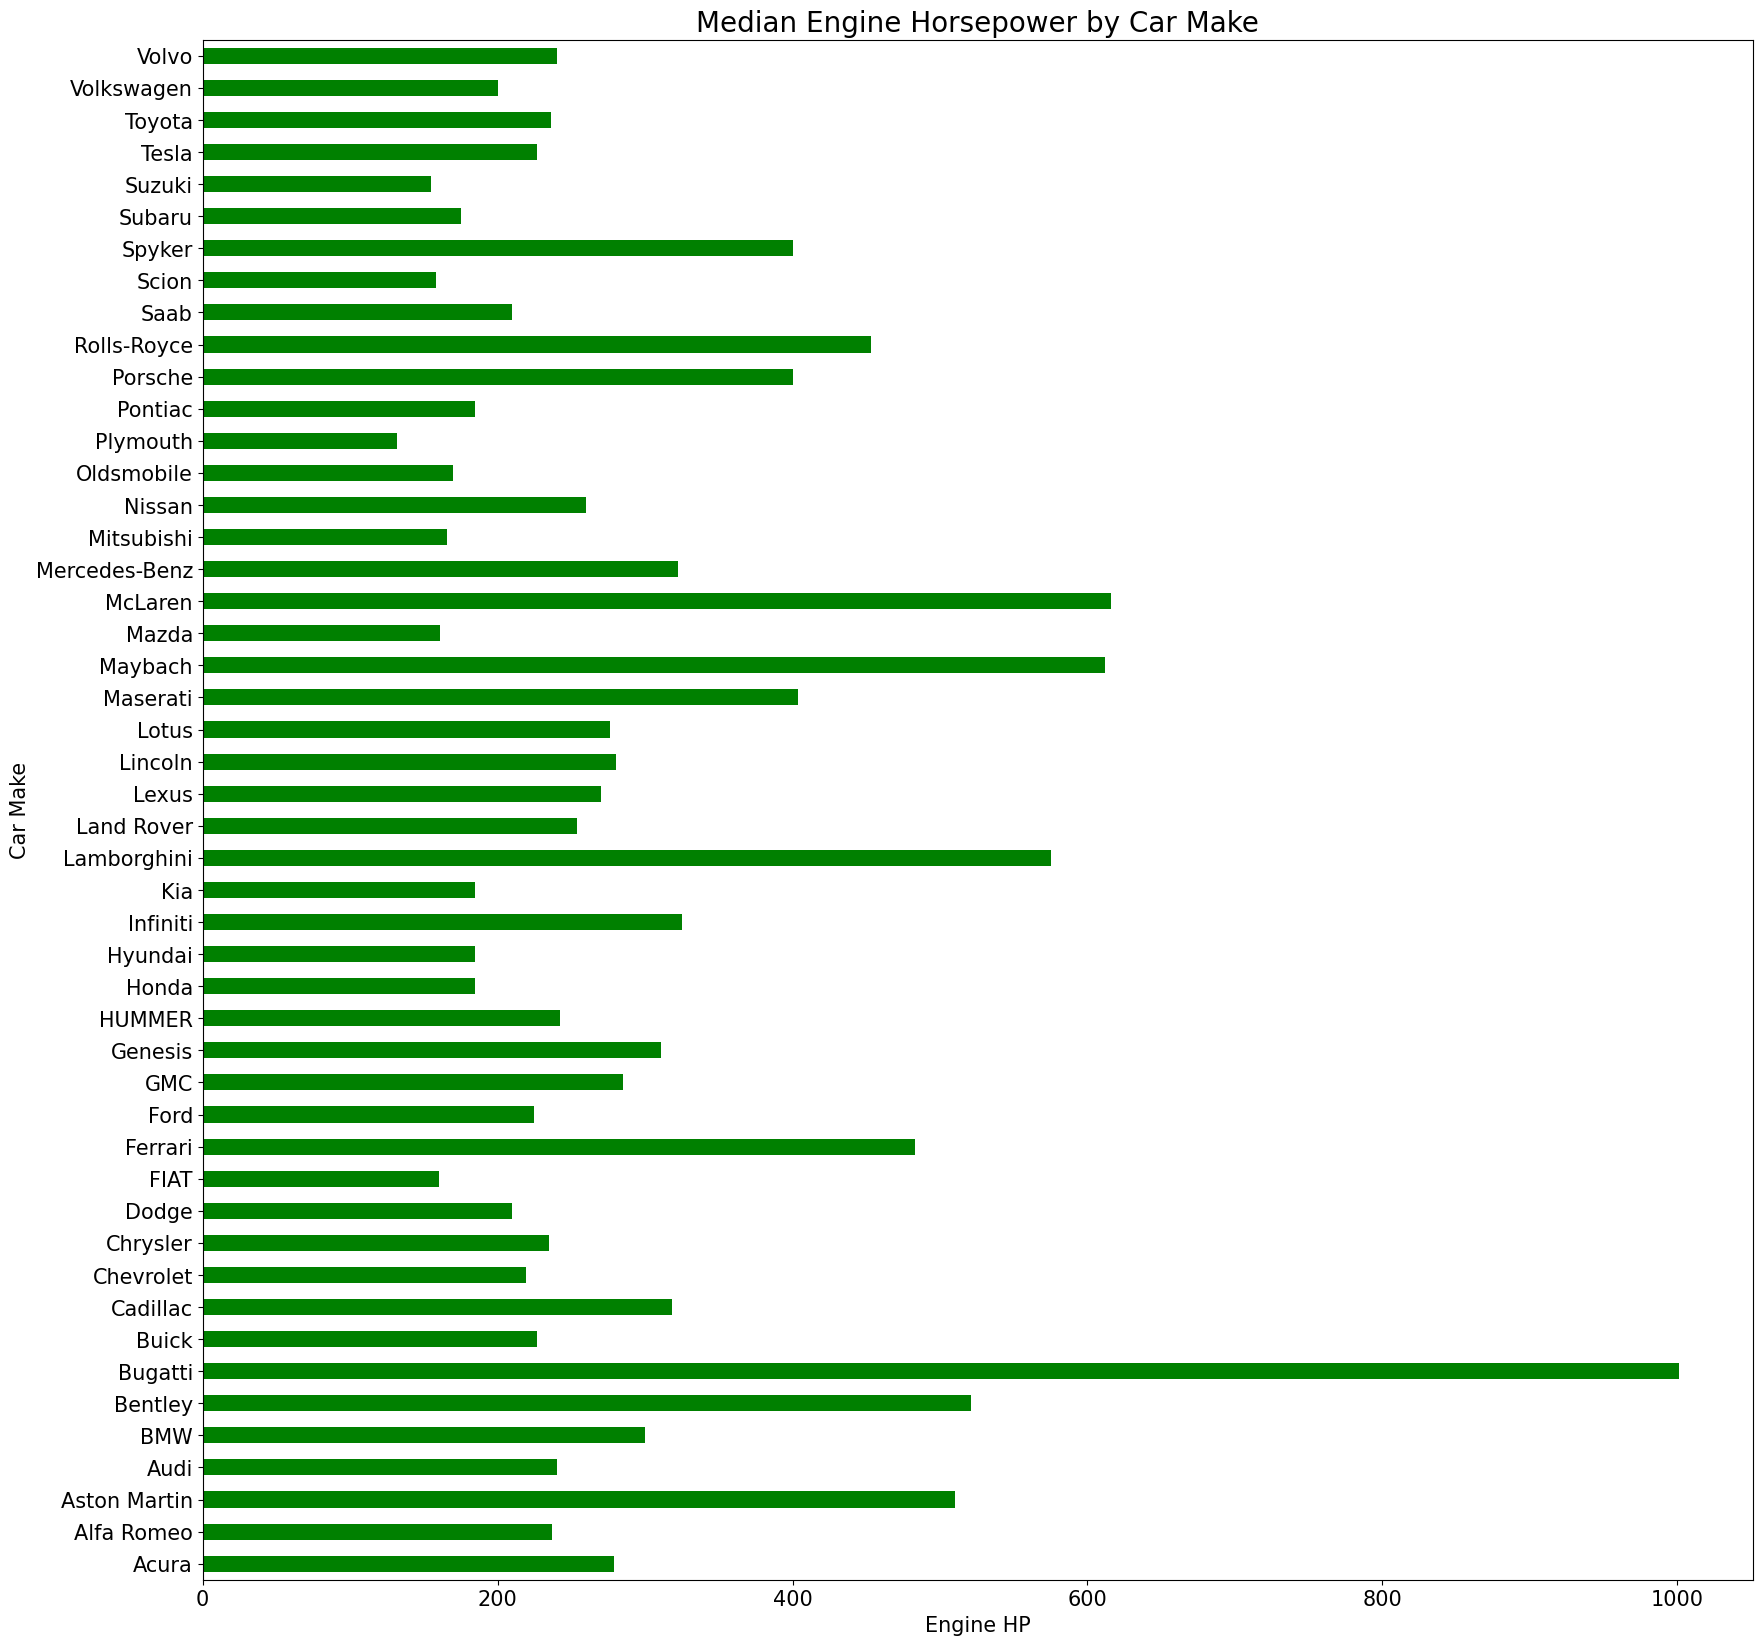

In [37]:
plt.figure(figsize=(20, 20))
df.groupby('Make')['Engine HP'].median().plot(kind='barh', fontsize=15, color='green')
plt.title("Median Engine Horsepower by Car Make", fontsize=20)
plt.xlabel("Engine HP", fontsize=15)
plt.ylabel("Car Make", fontsize=15)
plt.show()

### The data was grouped by car make to analyze median engine horsepower. As expected, Bugatti has the highest horsepower, followed by other high-performance brands like McLaren and Maybach. Tesla does not appear in the graph due to missing horsepower data.

## Grouping on the basis of Driven Wheels

C:\Users\farha\AppData\Local\Temp\ipykernel_4184\830230409.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Driven_Wheels').mean()['MSRP'].plot(kind = 'barh', color = 'blue')


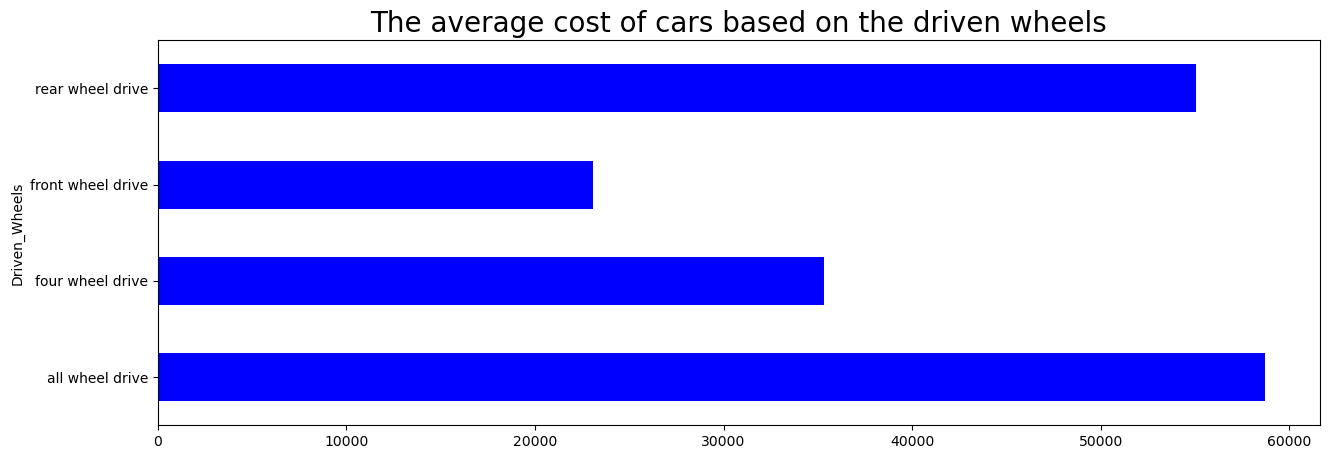

In [38]:
plt.figure(figsize = (15, 5))
df.groupby('Driven_Wheels').mean()['MSRP'].plot(kind = 'barh', color = 'blue')
plt.title("The average cost of cars based on the driven wheels", fontsize= 20)
plt.show()

### The data was grouped by driven wheels to calculate average car prices. All-wheel drive cars have the highest average price, followed by rear-wheel drive cars, which aligns with expectations due to their greater power and performance. Front-wheel drive cars are less expensive, reflecting real-world trends.

## Grouping on the basis of Make with 'Popularity' values

C:\Users\farha\AppData\Local\Temp\ipykernel_4184\965475098.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')


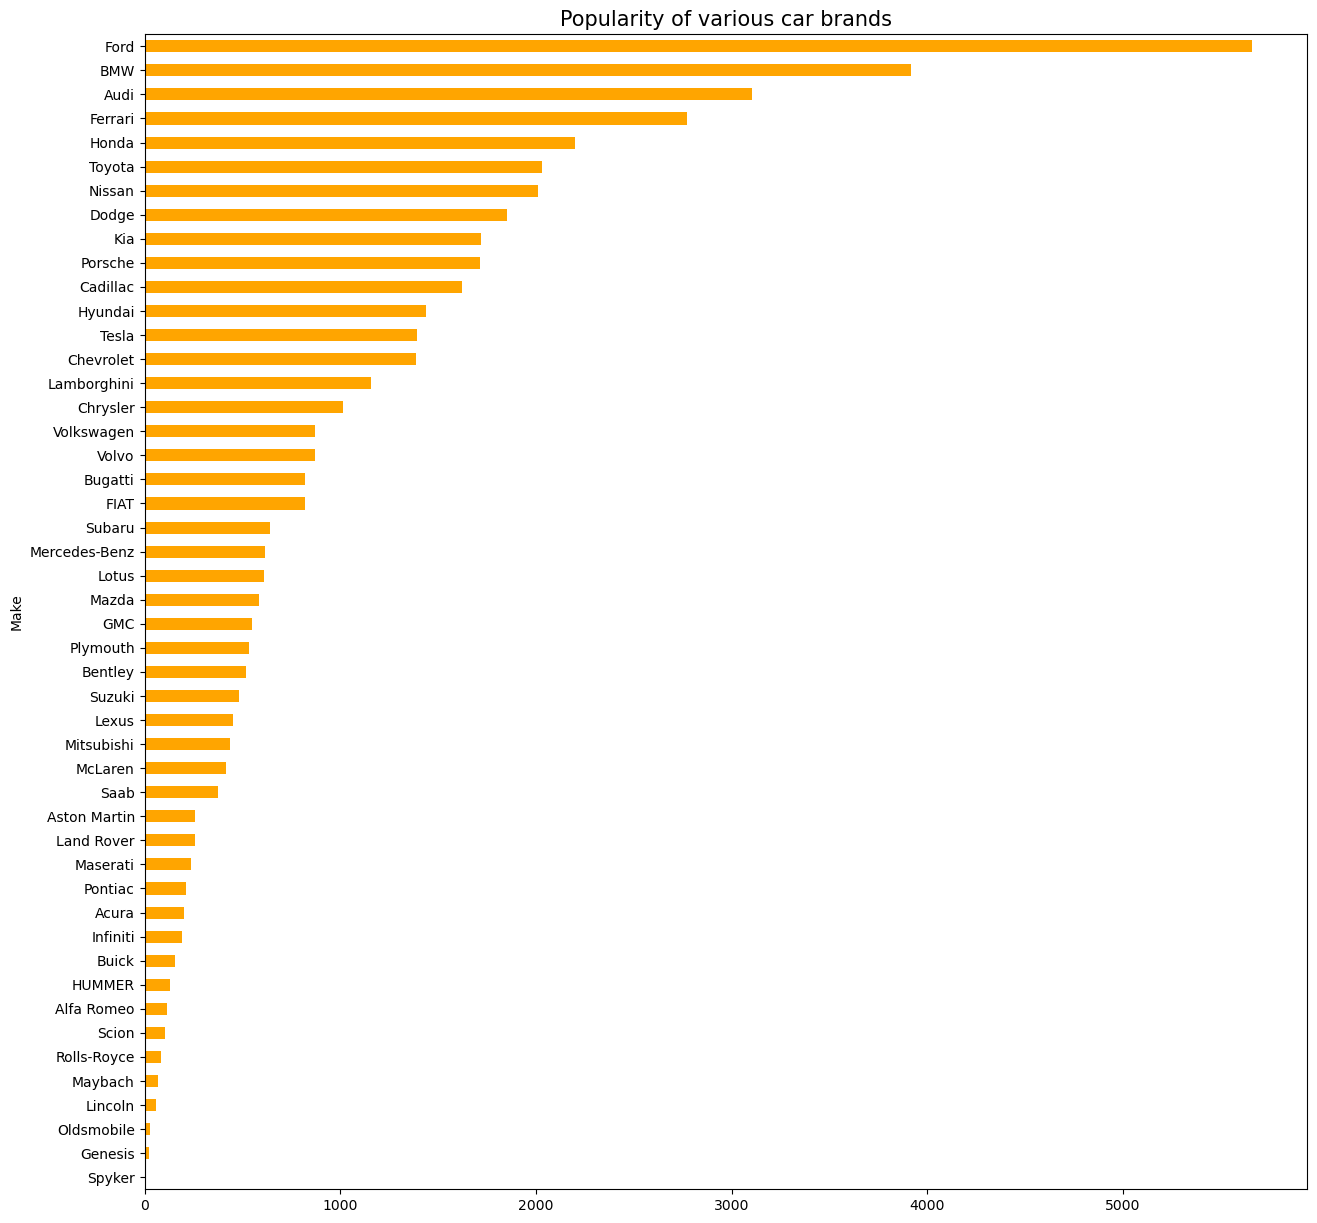

In [39]:
plt.figure(figsize = (15, 15))
df.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()

### The data shows that 'Ford' is the most popular car brand, followed by 'BMW' and 'Audi'. 'Toyota' also ranks high in popularity. In contrast, brands like 'Lincoln' and 'Genesis' appear less frequently and are less popular overall.

## Scatterplot between 'highway MPG' and 'city mpg'

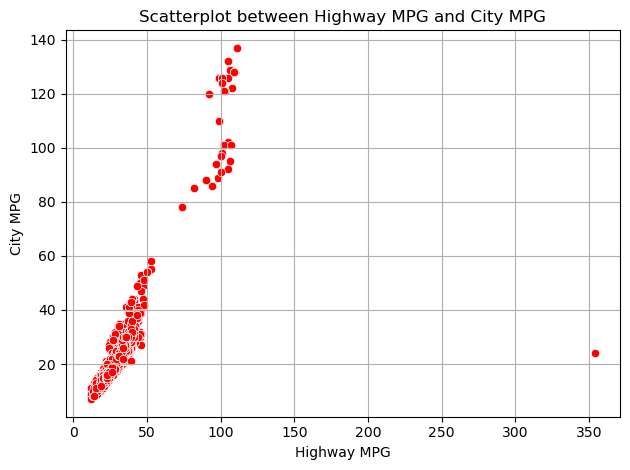

In [27]:
# Scatterplot
sns.scatterplot(x='highway MPG', y='city mpg', data=df, color='red')
plt.title("Scatterplot between Highway MPG and City MPG")
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.grid(True)
plt.tight_layout()
plt.show()

### There is a strong linear relationship between 'highway MPG' and 'city mpg', as expected. However, the data contains an outlier with a highway MPG around 350, which is unrealistic. Removing this outlier is important to prevent it from skewing the results, especially in machine learning applications where data accuracy is critical.

### Remove the outlier in the data where the highway MPG is about 350

In [28]:
df[df['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354,24,3105,51600


In [29]:
data = df[df['highway MPG'] < 350]

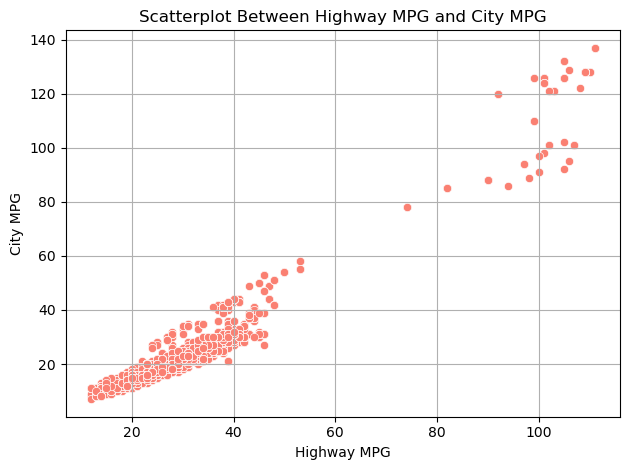

In [30]:
# Create scatterplot
sns.scatterplot(x='highway MPG', y='city mpg', data=data, color='salmon')
plt.title("Scatterplot Between Highway MPG and City MPG")
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.grid(True)
plt.tight_layout()
plt.show()

### After removing the outliers, the scatterplot shows an almost linear relationship between 'highway MPG' and 'city mpg', which is expected given the strong correlation between the two features.

## Boxplot of highway MPG

Boxplots help visualize the distribution of data by showing the 25th, 50th (median), and 75th percentiles. They also make it easy to detect outliers using the interquartile range (IQR), which is the difference between the 75th and 25th percentiles.

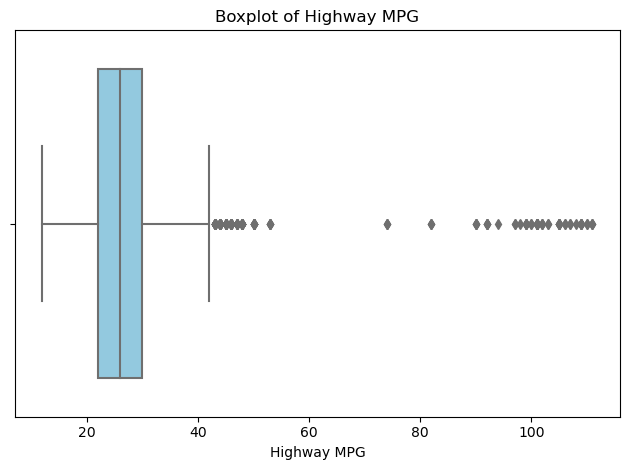

In [47]:
# Create boxplot with a different color
sns.boxplot(x='highway MPG', data=data, color='skyblue')
plt.title("Boxplot of Highway MPG")
plt.xlabel("Highway MPG")
plt.tight_layout()
plt.show()

### We analyzed the boxplot of highway MPG to understand the average value and the distribution spread. The average highway MPG is approximately 25. The maximum value observed is around 40, with any points above that considered outliers. The data distribution is relatively compact, as most values fall between 21 and 30.

## Boxplot of city mpg

<Axes: xlabel='city mpg'>

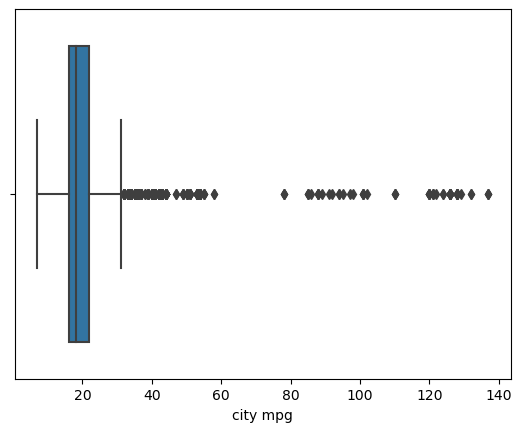

In [50]:
sns.boxplot(x = 'city mpg', data = data)

## Boxplot of 2 features 'city mpg' and 'highway MPG'

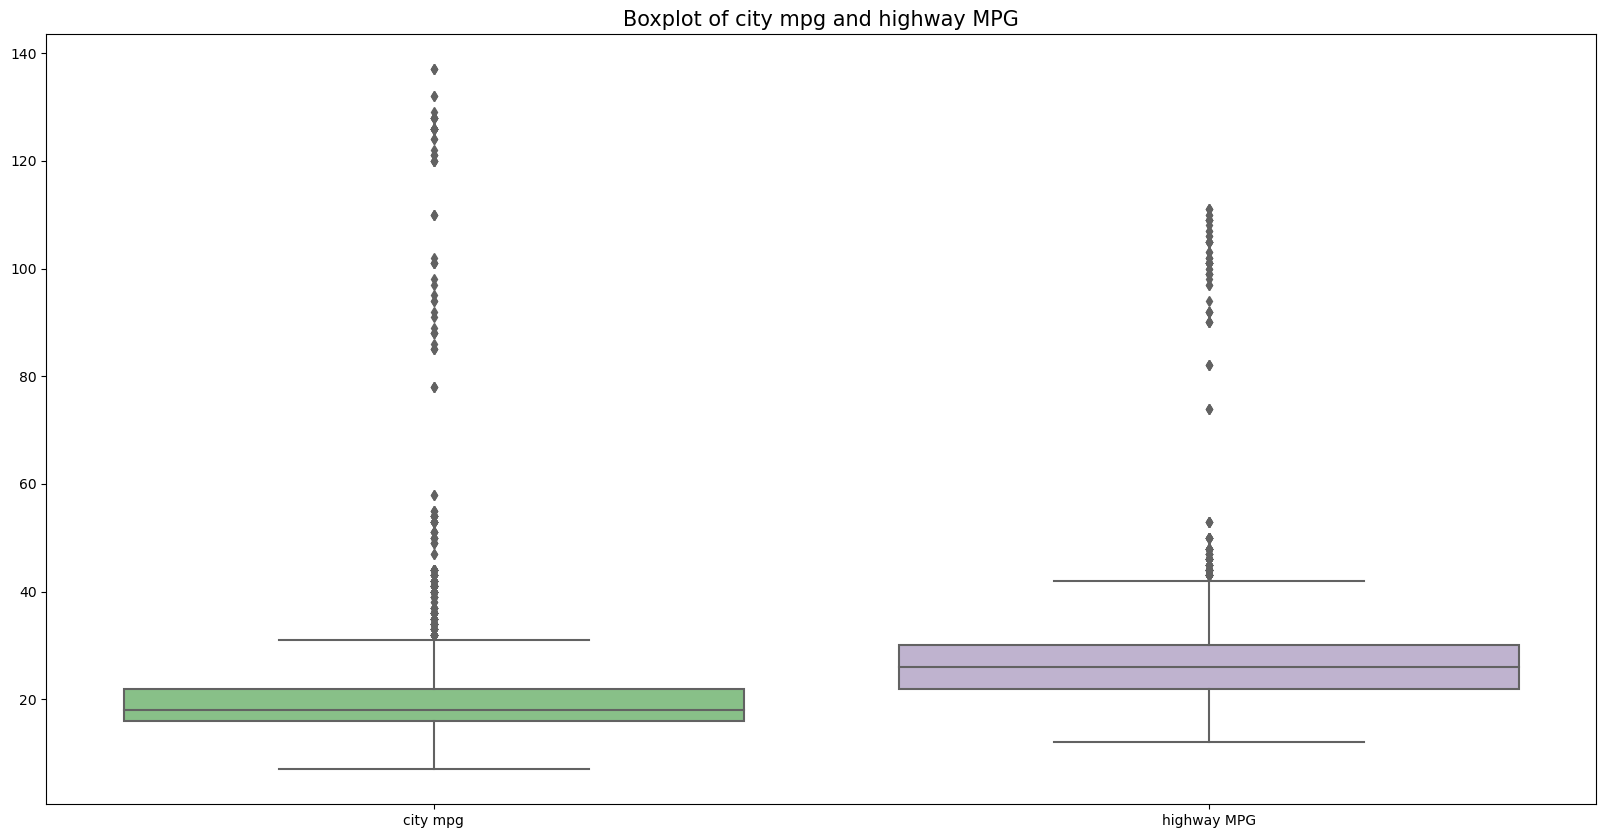

In [53]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

We examined the features 'city MPG' and 'highway MPG' and observed that most 'city MPG' values fall between 15 and 22, while 'highway MPG' values mostly range from 22 to 30. Comparing their boxplots highlights how the data spreads differently across these two features.

## Regplot between 'Engine HP' and 'Popularity'
regplot is a function from the Seaborn library used to create a scatter plot with an optional regression line fitted to the data.

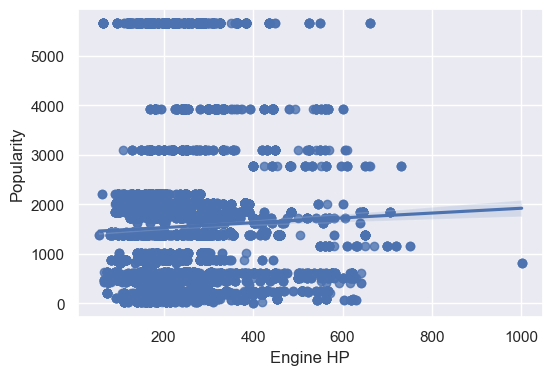

In [60]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x='Engine HP', y='Popularity', data=data)
plt.show()

### Using a regplot to examine the relationship between 'Engine HP' and 'Popularity,' we observe that most data points show little correlation. However, the positive slope of the regression line suggests that higher engine horsepower is generally associated with greater popularity. It’s important to remember that correlation does not imply causation.

### Regplot between Engine Cylinders and Popularity

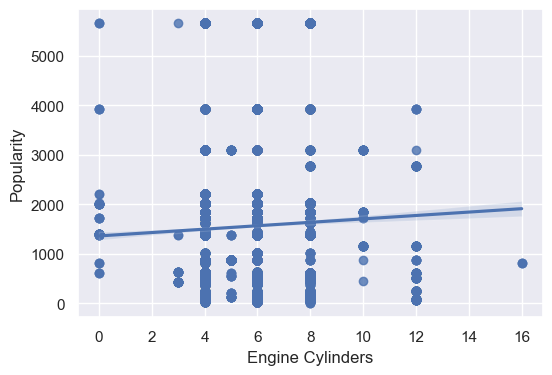

In [62]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x='Engine Cylinders', y='Popularity', data=data)
plt.show()

We plotted a regplot between 'Engine Cylinders' and 'Popularity' to explore their relationship. The plot shows a positive correlation between these two variables, indicating they tend to increase together. However, this correlation does not imply causation, having more engine cylinders does not necessarily cause a car to be more popular.

## Regplot between 'Number of Doors' and 'Popularity'

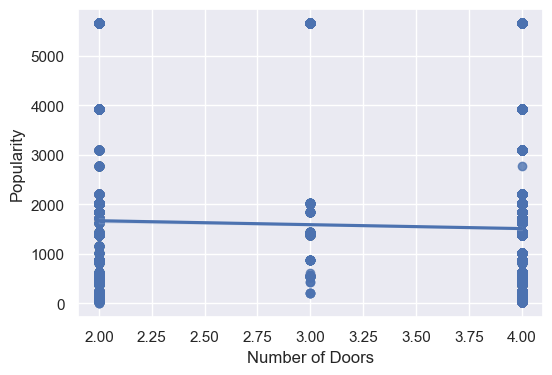

In [63]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x='Number of Doors', y='Popularity', data=data)
plt.show()

The plot shows a negative slope between 'Popularity' and 'Number of Doors,' indicating they are inversely related. Generally, cars with fewer doors—often just 2—tend to be more popular, which aligns with real-world examples like the Bugatti Veyron and Lamborghini Gallardo. This suggests the dataset accurately reflects real-world trends.

### Regplot between 'Engine Cylinders' and 'Engine HP'

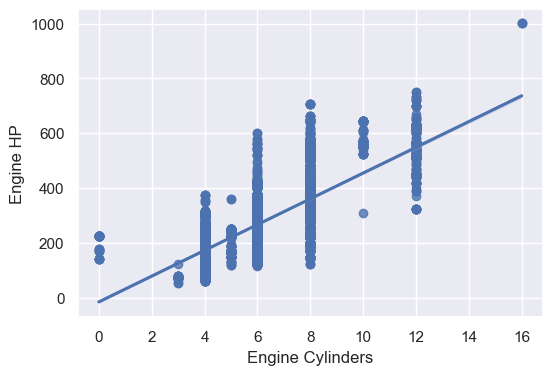

In [64]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x = 'Engine Cylinders', y = 'Engine HP', data=data)
plt.show()

The plot shows a strong correlation between 'Engine Cylinders' and 'Engine HP,' reflected by the nearly perfect linear trend. This makes lmplot a suitable choice to visualize the linear relationship between these two features.

### Regplot between 'city mpg' and 'highway MPG'

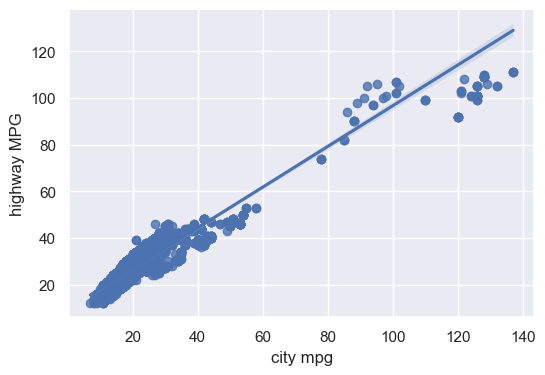

In [65]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x = 'city mpg', y = 'highway MPG', data=data)
plt.show()

The features analyzed show a clear linear relationship, which aligns with real-world patterns. This suggests the dataset is representative of real-world data.

## Regplot between 'city mpg' and 'Engine Cylinders'

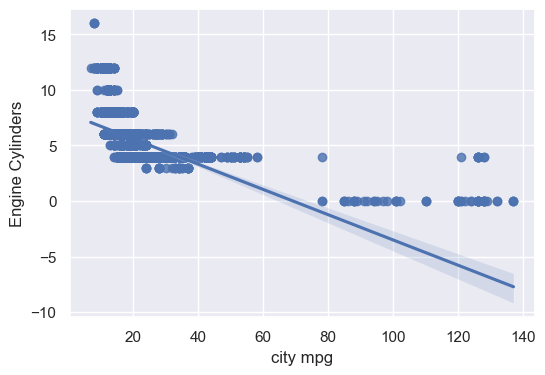

In [66]:
plt.figure(figsize=(6, 4))  # smaller width and height
sns.regplot(x = 'city mpg', y = 'Engine Cylinders', data=data)
plt.show()

#### The plot shows an inverse relationship between 'city mpg' and 'Engine Cylinders'- as the number of cylinders increases, city mileage tends to decrease. This trend aligns with real-world observations.

## Data Manipulation
### To prepare data for machine learning models, it needs to be manipulated into a suitable format. This includes using libraries like shuffle to randomly organize data and encoding text data into numerical vectors so algorithms can understand and process them effectively.

## Shuffling the data
Although many machine learning projects overlook it, shuffling data is crucial. Randomly shuffling ensures the model learns patterns without being influenced by any specific order or timeframe, leading to more reliable and unbiased predictions.

In [31]:
shuffled_data = shuffle(df, random_state=100)
X = shuffled_data.drop(['MSRP'], axis=1)
y = shuffled_data['MSRP']

## Dividing the data into training and testing set
To evaluate model performance, the data is divided into training and testing sets. Typically, an 80:20 split is used, where 80% of the data (e.g., 8,000 out of 10,000 points) is used for training and 20% for testing. However, in some cases, a 70:30 split may also be applied, depending on the project needs.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [36]:
print(f"Input training data shape: {X_train.shape}")
print(f"Output training data shape: {y_train.shape}")
print(f"Input testing data shape: {X_test.shape}")
print(f"Output testing data shape: {y_test.shape}")

Input training data shape: (9531, 14)
Output training data shape: (9531,)
Input testing data shape: (2383, 14)
Output testing data shape: (2383,)


### We see the shape of the data to observe how it has been divided. The training set contains approximately 9,531 rows, while the test set has about 2,383 rows. These values confirm the data split

## Encoding the data
### In machine learning, it's essential to encode categorical data into numerical values. This conversion allows models to process the data as mathematical vectors, enabling effective analysis and prediction.

In [38]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols='Year')

In [39]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10938,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031
1223,Honda,Accord,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202
472,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774
8150,Dodge,Ram Pickup 1500,2008,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851
2038,Ford,Bronco,1996,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657


### We will apply target encoding by replacing each category with the average 'MSRP' value associated with it. This simplifies the machine learning model's task, as it directly receives meaningful numerical values related to the target, eliminating the need for additional encoding.

In [40]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )

TargetEncoder(cols=['Year'])

The encoder uses the training data only to learn the encoding, preventing data leakage.

When use encoder.transform() on new data (validation or test), it will replace 'Year' categories with the learned average 'MSRP' from training.

We will transform the column by replacing its values with encoded ones, ensuring that it is optimized to produce the most relevant output for the model.

In [41]:
X_train['Year'] = encoder.transform(X_train['Year'])

We transform the 'Year' column by replacing each value with its corresponding encoded value based on the average 'MSRP'. This makes the feature more informative for the model and supports better prediction accuracy.

We must ensure that the transformation is based only on the training set to avoid data leakage. Using target values from the test set would compromise model integrity and lead to misleading results.

In [42]:
X_test['Year'] = encoder.transform(X_test['Year'])

We apply the encoder to the test set using the mappings learned from the training data, ensuring consistent transformation while preventing data leakage.

In [43]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10938,Toyota,Tundra,47425.389850,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031
1223,Honda,Accord,47425.389850,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202
472,Ferrari,458 Italia,47425.389850,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774
8150,Dodge,Ram Pickup 1500,56718.941781,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851
2038,Ford,Bronco,2363.489029,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657


We will follow the same set of steps for other models, ensuring that we apply the appropriate transformations based on our dataset. This includes encoding categorical features using values derived from the training data to maintain consistency and prevent data leakage.

### Target encoding on the 'Model' column by learning the average 'MSRP' for each model from the training set

In [44]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

### We use target encoding on the 'Model' column by learning the average 'MSRP' for each model from the training set. We then apply this transformation consistently to both the training and test sets to make the feature numeric and informative for the machine learning model, while avoiding data leakage.

In [45]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10938,Toyota,37820.886320,47425.389850,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031
1223,Honda,28047.497942,47425.389850,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202
472,Ferrari,88197.699767,47425.389850,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774
8150,Dodge,31224.199483,56718.941781,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851
2038,Ford,32758.239792,2363.489029,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657


### Target encoding on the 'Make' column (i.e., the manufacturer of the vehicle) using the target variable 'MSRP'

In [46]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [47]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10938,28920.700168,37820.886320,47425.389850,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031
1223,26960.299728,28047.497942,47425.389850,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202
472,233388.362561,88197.699767,47425.389850,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774
8150,22283.702429,31224.199483,56718.941781,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851
2038,27017.591040,32758.239792,2363.489029,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657



## One Hot Encoding
### Now we will use one-hot encoding, a technique that converts each category in a feature into a separate binary column, setting the value to 1 when the category is present and 0 otherwise.

In [50]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

We apply one-hot encoding to selected categorical columns, converting each category into its own binary feature. This is done using the training data to learn the categories, and then the same transformation is applied to both training and test sets to maintain consistency.

We would concatenate the features with the X_train and X_test and remove the actual categorical features as they should not be given to the machine learning algorithms respectively.

In [52]:
# Get the column names created by the OneHotEncoder
encoded_cols = encoder.get_feature_names_out(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'])

# Convert sparse matrices to dense arrays, then to DataFrames with proper column names and matching index
one_hot_encoded_output_train = pd.DataFrame(one_hot_encoded_output_train.toarray(), columns=encoded_cols, index=X_train.index)
one_hot_encoded_output_test = pd.DataFrame(one_hot_encoded_output_test.toarray(), columns=encoded_cols, index=X_test.index)

# Now concatenate
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis=1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis=1)

In [53]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

### Here, I dropped the original categorical columns from X_train and X_test after adding their one-hot encoded features, ensuring the datasets contain only numerical data for the machine learning model.

### We will check the data information to review the types of values present. Since the dataset contains only float and integer values, with no object types, it is ready to be used for machine learning model implementation.

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 10938 to 2278
Data columns (total 48 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Make                                                           9531 non-null   float64
 1   Model                                                          9531 non-null   float64
 2   Year                                                           9531 non-null   float64
 3   Engine HP                                                      9531 non-null   float64
 4   Engine Cylinders                                               9531 non-null   float64
 5   Number of Doors                                                9531 non-null   float64
 6   highway MPG                                                    9531 non-null   int64  
 7   city mpg                                                

## Standardization and Normalization of data
### We will process our data by applying operations like standardization and normalization before feeding it to the machine learning algorithms. Specifically, we will transform the features using MinMaxScaler to scale the values appropriately.

In [55]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [56]:
X_train_new.shape

(9531, 48)

#### We will create an empty list to which we’ll append results later, allowing us to analyze and compare different machine learning algorithms for deployment.

In [57]:
error_mean_square = []
error_mean_absolute = []
r2_scores = []

## Machine Learning Analysis
### In this section, we will apply various machine learning models to evaluate their performance on the test set. We'll visualize the results using plots like regplots and barplots to compare model accuracy. This analysis will help us identify and select the best model for predicting car prices.

### Linear Regression
#### We will start by using a linear regression model, which is a simple and effective method for predicting continuous values. The process involves fitting the model to the training data and outputs, making predictions, and then comparing these predictions to the actual values using evaluation metrics. Similarly, we will apply several other machine learning models, evaluate their performance with the same metrics, and compare the results to identify the best-performing algorithm.


In [58]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

We will use the model’s predict method to generate predictions for the test set, storing these predicted values in y_predict for later comparison with the actual outcomes.

In [59]:
y_predict = model.predict(X_test_new)

We will store the evaluation results—mean squared error, R² score, and mean absolute error—in their respective lists. Later, we’ll plot these metrics to visualize and compare how well each machine learning model performed on the test set.

In [60]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

We see that there is a value appended in the list below.

In [61]:
error_mean_absolute

[12103]

In [62]:
error_mean_square

[852673246]

In [63]:
r2_scores

[0.7451217197032862]

A useful approach is to create a DataFrame that includes both the predicted and actual values. This makes it easy to visualize and compare the differences between the predictions and the true results through plotting.

In [64]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

This line converts the predicted values stored in y_predict into a pandas DataFrame with a column named 'Predicted Output'. This makes it easier to work with and visualize the predictions alongside actual values.

In [65]:
y_predict.head()

,Predicted Output
0,57028.756401
1,30769.758658
2,-2664.782084
3,31277.430811
4,41639.483063


In [66]:
y_test.to_frame().head()

,MSRP
1451,47800
5801,27050
4820,16949
11756,23390
6854,41895


Here, we will concatenate the y_predict DataFrame with the y_test values to compare the predicted and actual outputs side by side, allowing us to evaluate how well the machine learning models performed.

In [67]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [68]:
results.head()

,Predicted Output,MSRP
0,57028.756401,47800
1,30769.758658,27050
2,-2664.782084,16949
3,31277.430811,23390
4,41639.483063,41895


## Regplot for Linear Regression Output


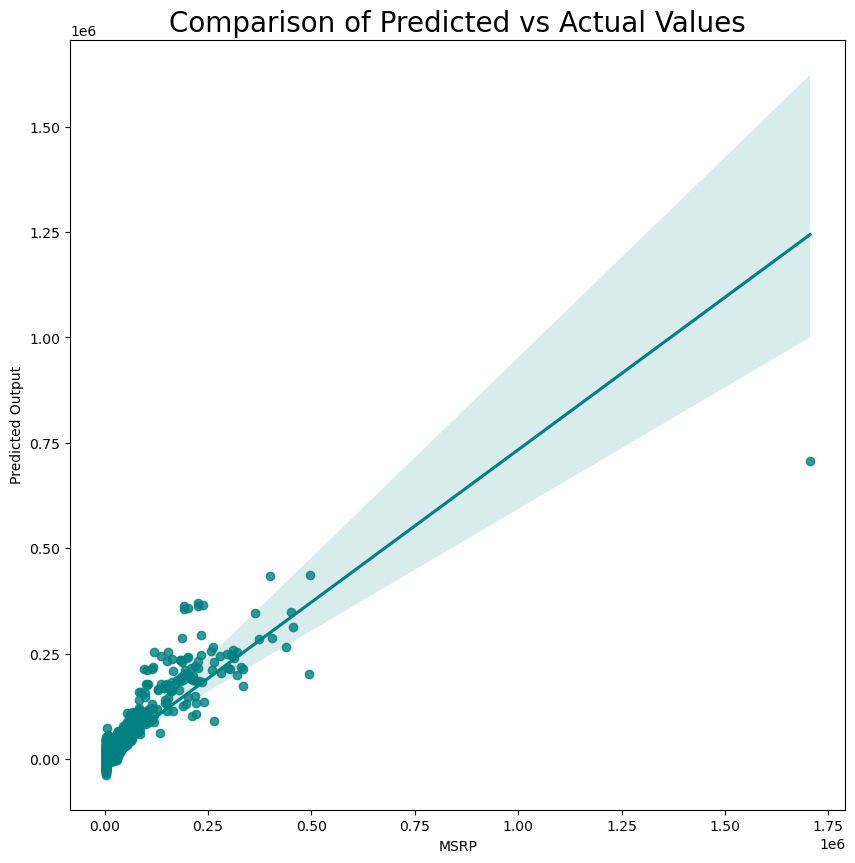

In [70]:
plt.figure(figsize=(10, 10))
sns.regplot(x='MSRP', y='Predicted Output', data=results, color='teal', marker='o')
plt.title("Comparison of Predicted vs Actual Values", fontsize=20)
plt.show()

#### I used seaborn's regplot to visualize the spread of the predicted versus actual values. This helps us assess how closely the predictions match the true values. From the plot, we can see that linear regression performed well, producing predictions close to the actual data. However, it's important to test other machine learning models too, to identify the best one for deployment.

## MLP Regressor
#### MLP Regressor is a type of neural network used for regression tasks that models complex relationships by learning multiple layers of neurons. It can capture nonlinear patterns in data, making it effective for predicting continuous values.
#### We will use the MLP Regressor, a neural network model, for predictions. It will have 50 neurons in the hidden layer and use an alpha value of 0.001 for regularization. For the learning rate, we’ll use the ‘adaptive’ setting, which adjusts the learning rate based on training progress.

In [71]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

c:\Users\farha\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Regplot of MLP Regressor
#### We will use a scatterplot to compare the actual and predicted values from the MLP regressor, helping us evaluate its performance visually. This model also performs well, so next, we will plot the mean squared error and mean absolute error for all the models tested to identify the best one for deployment. While hyperparameter tuning can further improve accuracy, it is complex and time-consuming, so for our purposes, selecting the best-performing model based on current results is sufficient.

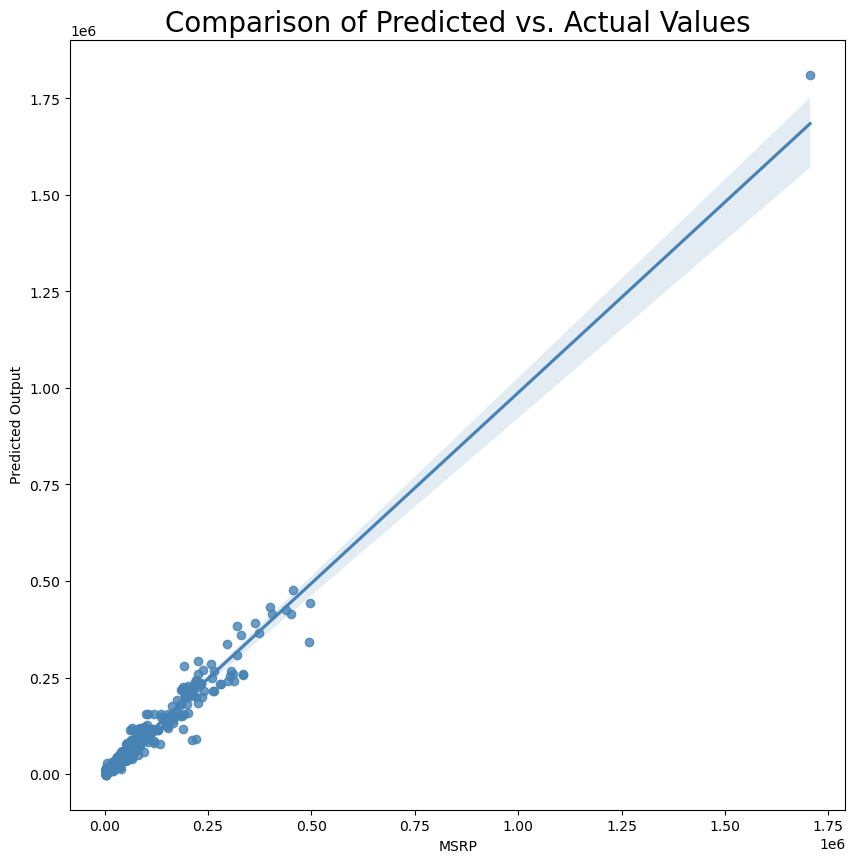

In [72]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='steelblue', marker='o')
plt.title("Comparison of Predicted vs. Actual Values", fontsize=20)
plt.show()

#### This model also performs well, so next, we will plot the mean squared error, r2 scores, and mean absolute error for all the models tested to identify the best one for deployment. While hyperparameter tuning can further improve accuracy, it is complex and time-consuming, so for our purposes, selecting the best-performing model based on current results is sufficient.

In [73]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

## Gradient Boosting Regressor
We will use the Gradient Boosting Regressor and follow the same steps: training the model on the training data, predicting on the test set, and evaluating its performance. Although hyperparameter tuning can improve results, we will first assess how the model performs using its default settings

In [74]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

### Regplot of Gradient Boosting Regressor

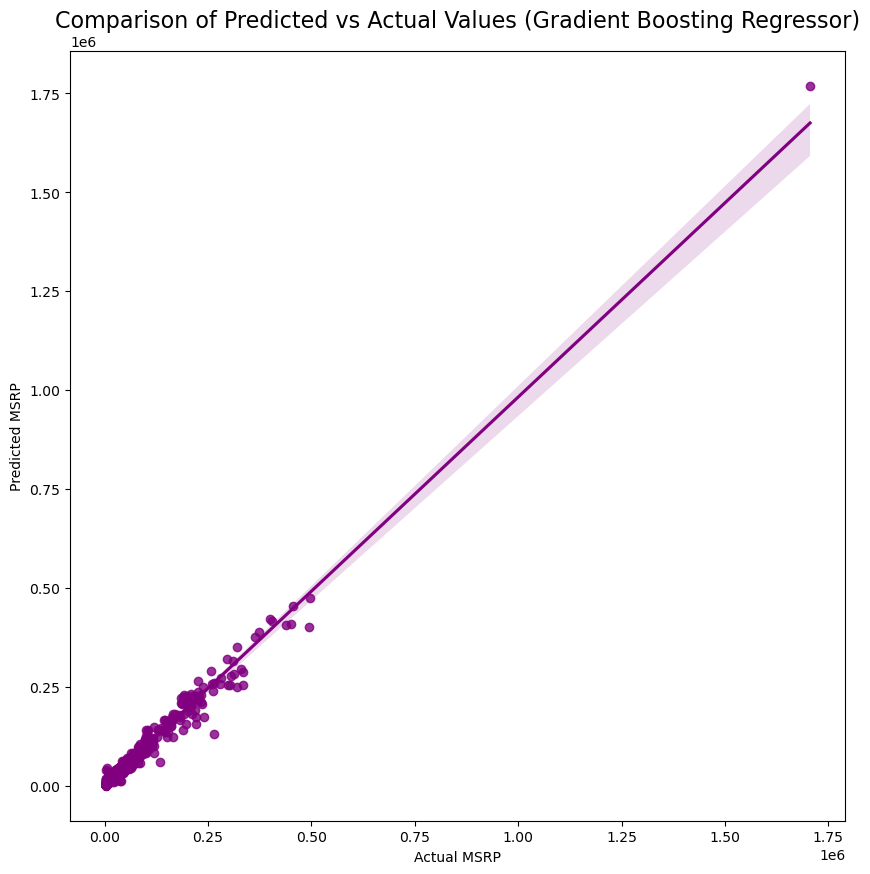

In [75]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='purple', marker='o')
plt.title('Comparison of Predicted vs Actual Values (Gradient Boosting Regressor)', fontsize=16)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.show()

### I have used the Gradient Boosting Regressor to generate predictions and visualize them with a scatterplot. The model performs well, producing mostly accurate predictions with only a few outliers. Overall, it is a strong candidate for making reliable predictions.

We will append the error metrics to the lists we created earlier, allowing us to visualize and compare the performance of different models later on.

In [76]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

## Decision Tree Regressor
#### We will use the Decision Tree Regressor with random splits. After fitting the model on the training data, we will predict the test set values to evaluate how well the algorithm performs. This will help us understand its effectiveness on our dataset.

In [77]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## Regplot for Decision Tree Regressor
#### We will use a regplot to visualize the performance of the Decision Tree Regressor by comparing predicted and actual values. The model performs well in predicting the test outputs, indicating it is suitable for deployment. However, to further improve its accuracy, hyperparameter tuning should be performed to optimize the model’s performance.

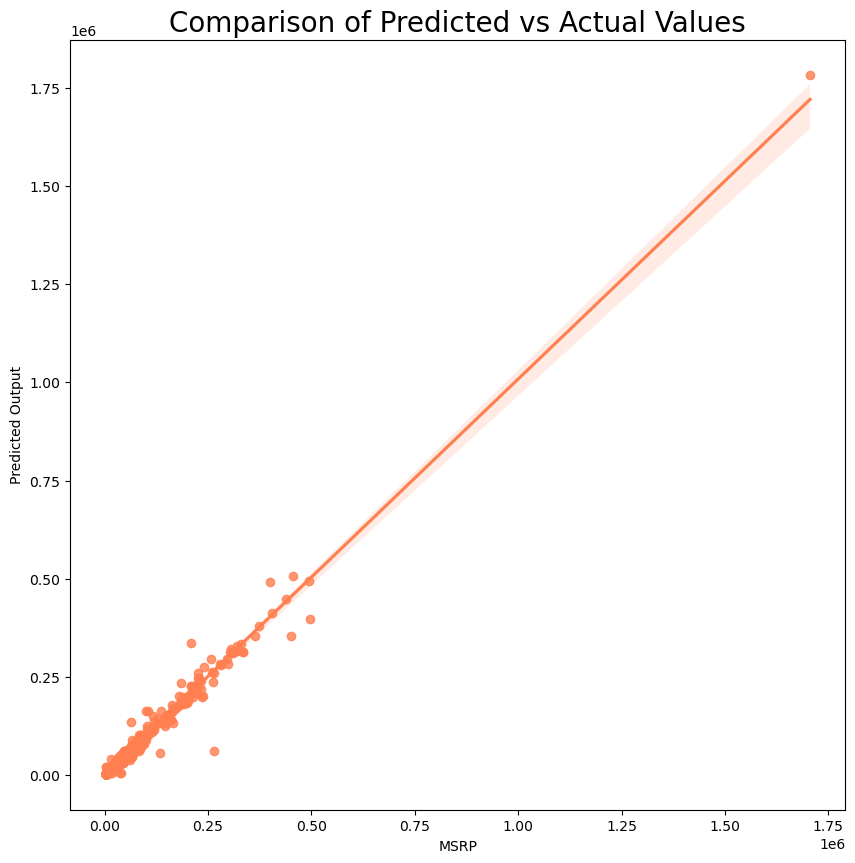

In [78]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='coral', marker='o')
plt.title("Comparison of Predicted vs Actual Values", fontsize=20)
plt.show()

In [79]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

## PLS Regression
#### Partial Least Squares (PLS) Regression is a technique that models the relationship between predictors and response variables by extracting latent components to handle multicollinearity and reduce dimensionality.

In [80]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## Regplot for PLS Regression

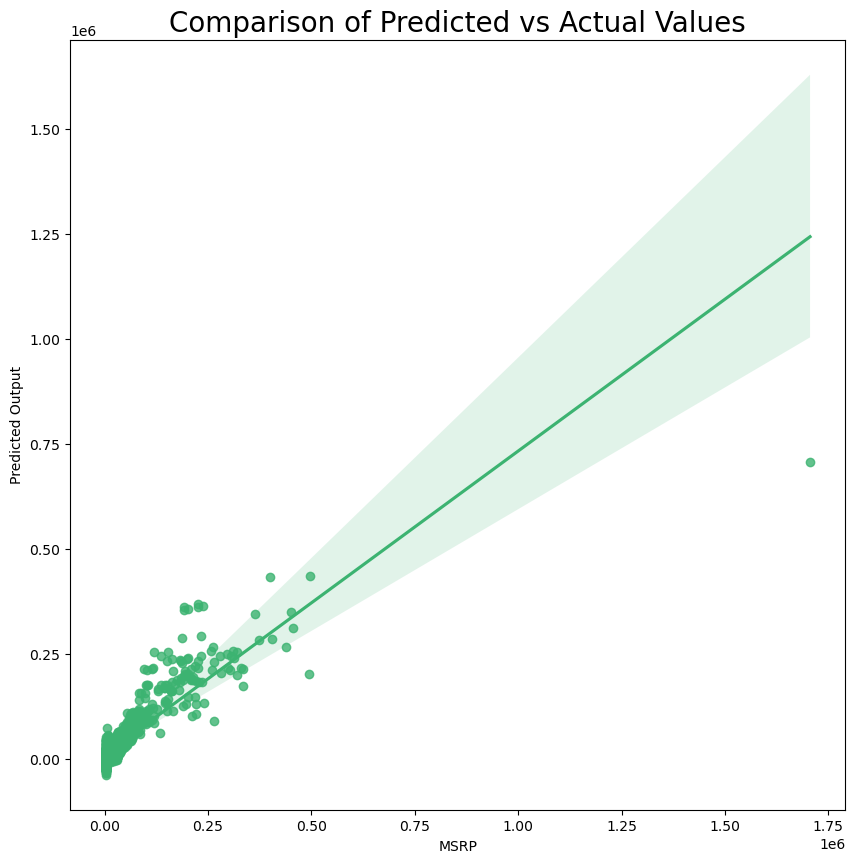

In [81]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='mediumseagreen', marker='o')
plt.title("Comparison of Predicted vs Actual Values", fontsize=20)
plt.show()

In [82]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

## K - Neighbors Regressor
#### K-Neighbors Regressor is a machine learning algorithm that predicts a continuous output by averaging the values of the k closest data points (neighbors) in the feature space. It is a simple, instance-based method that makes predictions based on the similarity between data points

In [83]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## Regplot for K - Neighbors Regressor

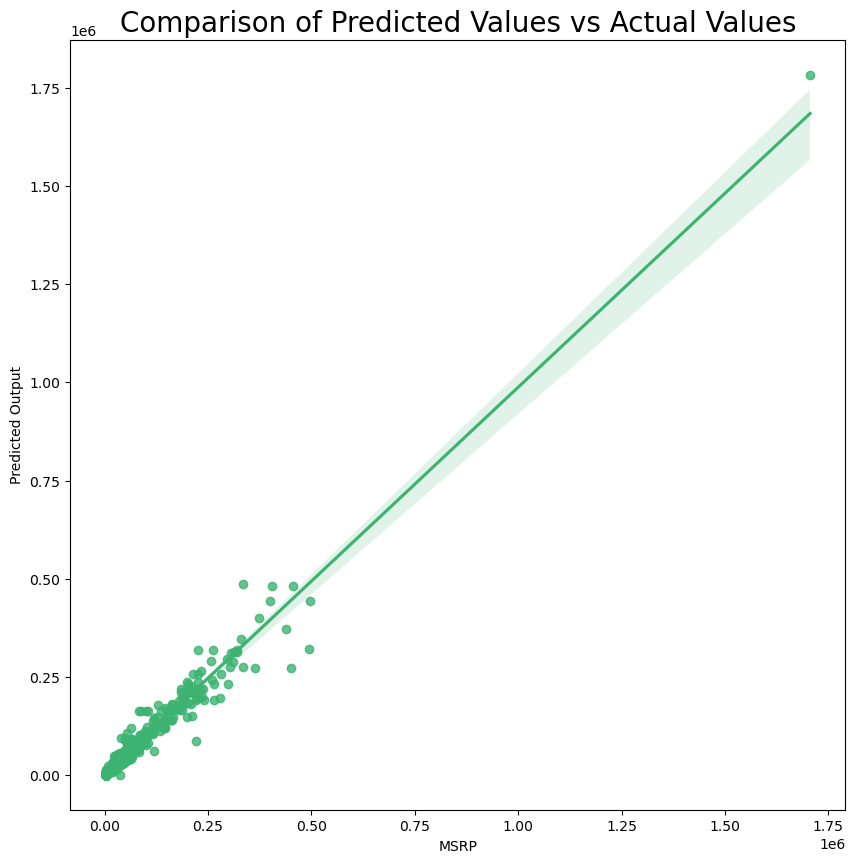

In [85]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='mediumseagreen', marker='o')
plt.title("Comparison of Predicted Values vs Actual Values", fontsize=20)
plt.show()

In [86]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

## Support Vector Regressor
Support Vector Regressor (SVR) is a type of machine learning model that uses support vector machines to predict continuous target values by finding a function that approximates the data within a certain margin of error.

In [87]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## Regplot for Support Vector Regressor

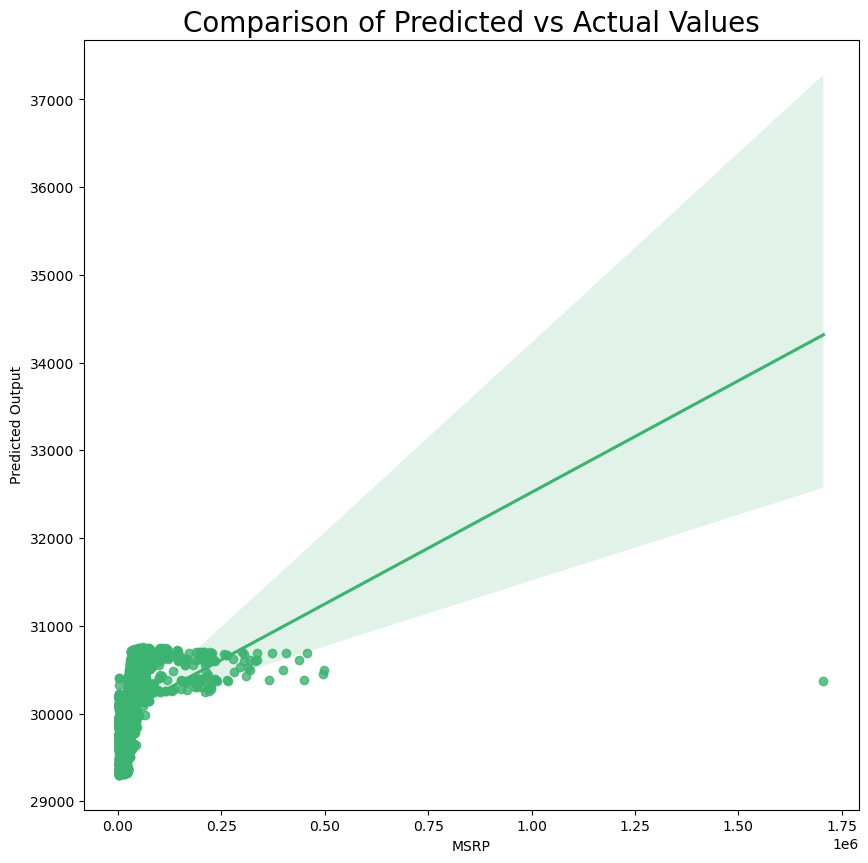

In [88]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='mediumseagreen', marker='o')
plt.title("Comparison of Predicted vs Actual Values", fontsize=20)
plt.show()

We can see the support vector regressor’s performance through this plot. The predictions deviate noticeably from the actual values, indicating poor accuracy for our use case. The large errors observed suggest that this model is not suitable due to its high margin of error.

In [89]:
error_mean_square.append(int(mean_squared_error(y_test, y_predict)))
error_mean_absolute.append(int(mean_absolute_error(y_test, y_predict)))
r2_scores.append(r2_score(y_test, y_predict))

### Dataframe of Machine Learning Models
Now, we will wrap up by creating a dataframe that consolidates all the models we used along with their corresponding error metrics. We'll take the error values we've collected in the lists and organize them into this dataframe to clearly compare the performance of each model.

In [90]:
model_names = [
    'Linear Regression',
    'MLP Regressor',
    'Gradient Boosting Regressor',
    'Decision Tree Regressor',
    'K Nearest Regressor',
    'PLS Regression',
    'Support Vector Regressor'
]

data = {
    'Models': model_names,
    'Mean Absolute Error': error_mean_absolute,
    'Mean Squared Error': error_mean_square,
    'R2 Score': r2_scores
}

model_dataframe = pd.DataFrame.from_dict(data)

In [91]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error,R2 Score
0,Linear Regression,12103,852673246,0.745122
1,MLP Regressor,4914,103371835,0.969100
2,Gradient Boosting Regressor,4202,67000848,0.979972
3,Decision Tree Regressor,3196,71344489,0.978674
4,K Nearest Regressor,12101,852680329,0.745120
5,PLS Regression,4387,123198364,0.963174
6,Support Vector Regressor,21950,3411373002,-0.019716


## Barplot of machine learning models with mean absolute error

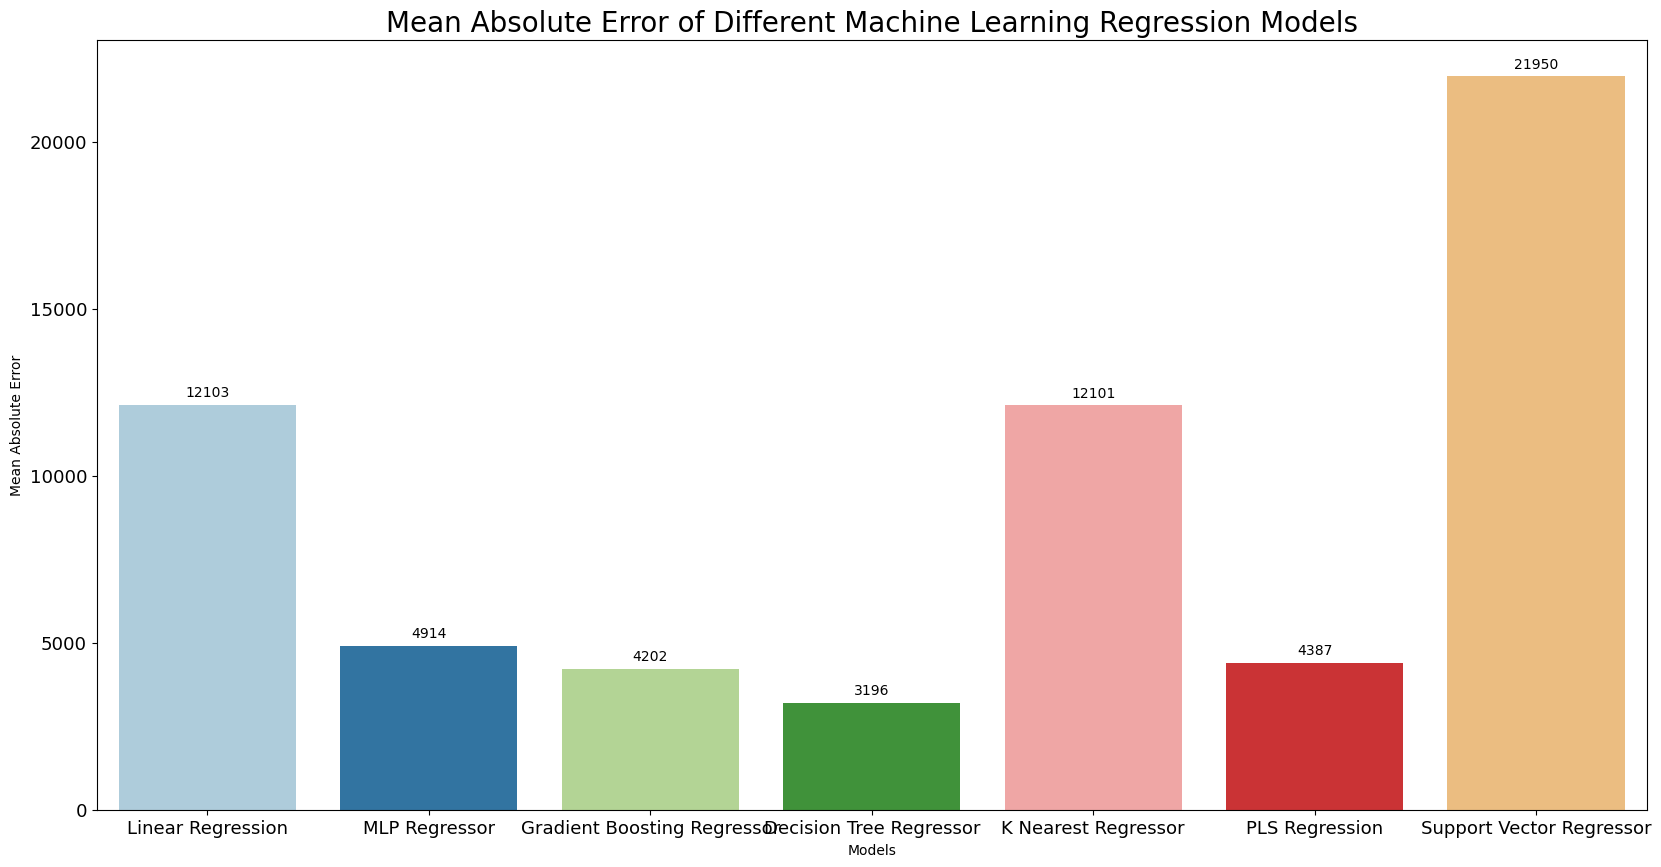

In [92]:
plt.figure(figsize=(20, 10))
splot = sns.barplot(data=model_dataframe, x='Models', y='Mean Absolute Error', palette='Paired')

for patch in splot.patches:
    height = patch.get_height()
    splot.annotate(f'{height:.0f}', 
                   (patch.get_x() + patch.get_width() / 2, height), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Mean Absolute Error of Different Machine Learning Regression Models", fontsize=20)
plt.show()

### The mean absolute error analysis reveals that the Support Vector Regressor has the highest error, aligning with its scatterplot observations. In contrast, both the Decision Tree Regressor and Gradient Boosting Regressor have the lowest mean absolute errors, making them the most suitable models for deployment and future predictions.


## Barplot of machine learning models with mean squared error

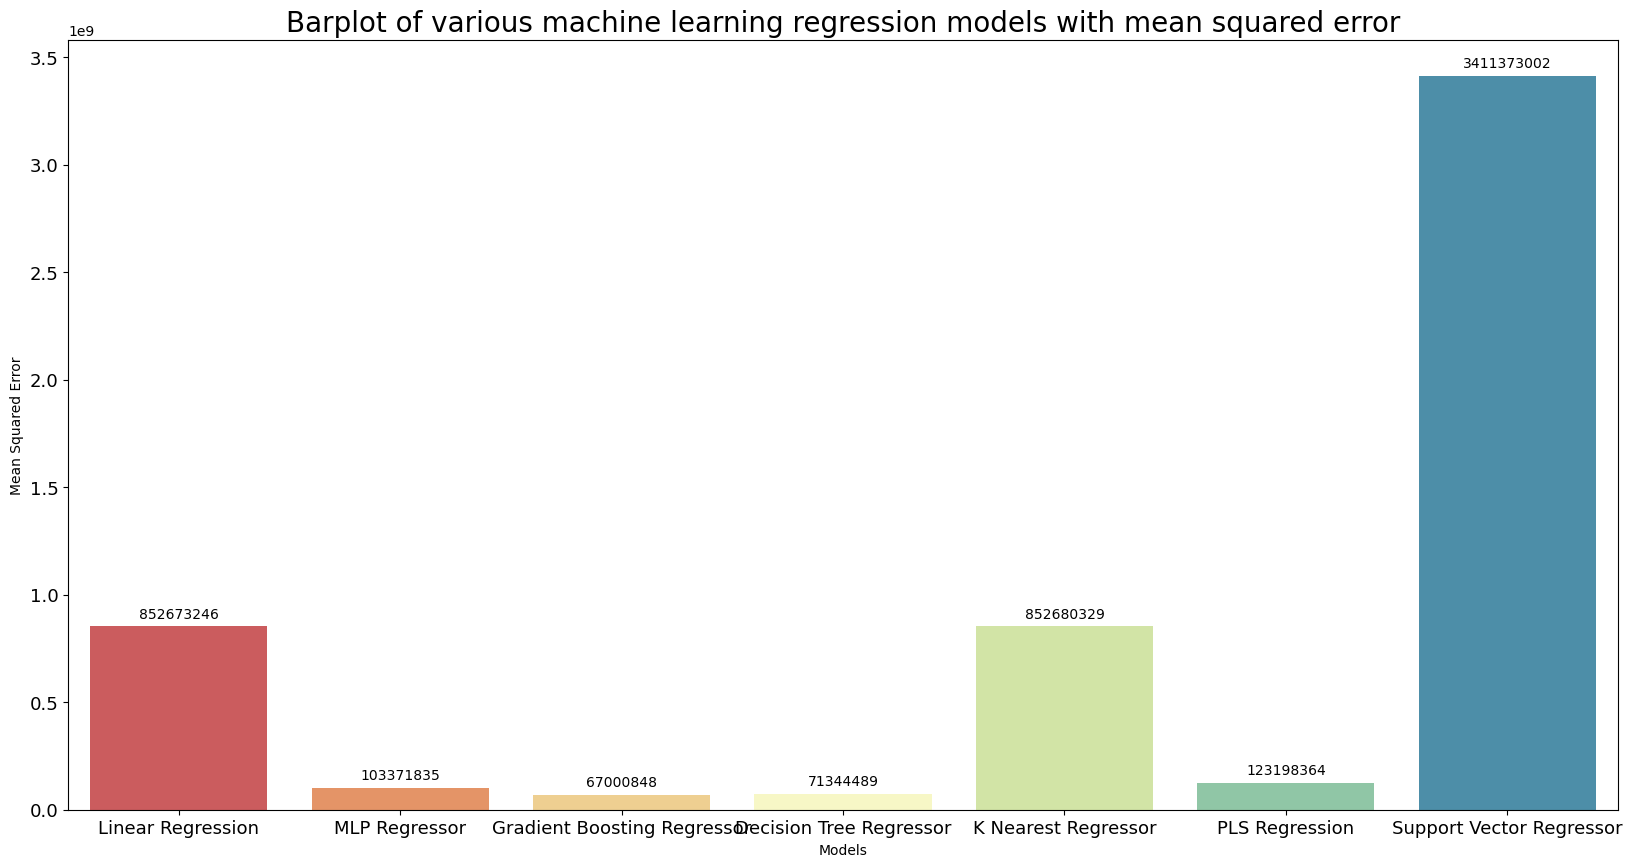

In [94]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

#### The results show that the Decision Tree Regressor and Gradient Boosting Regressor have the lowest mean squared errors (MSE) among all the models evaluated. 
Mean Squared Error (MSE) measures the average squared difference between the actual values and the predicted values. A lower MSE indicates that the predictions are closer to the actual values, meaning better model performance.

The Decision Tree Regressor is good at capturing non-linear relationships and fitting the data closely. In this case, it likely did an excellent job of learning the patterns in the training data and generalizing well to the test data.

The Gradient Boosting Regressor is an ensemble model that builds multiple weak learners (typically decision trees) and combines them to reduce error. Its low MSE suggests that it effectively minimized bias and variance.

## Bar plot comparing the R² values of different machine learning models to evaluate their predictive performance.

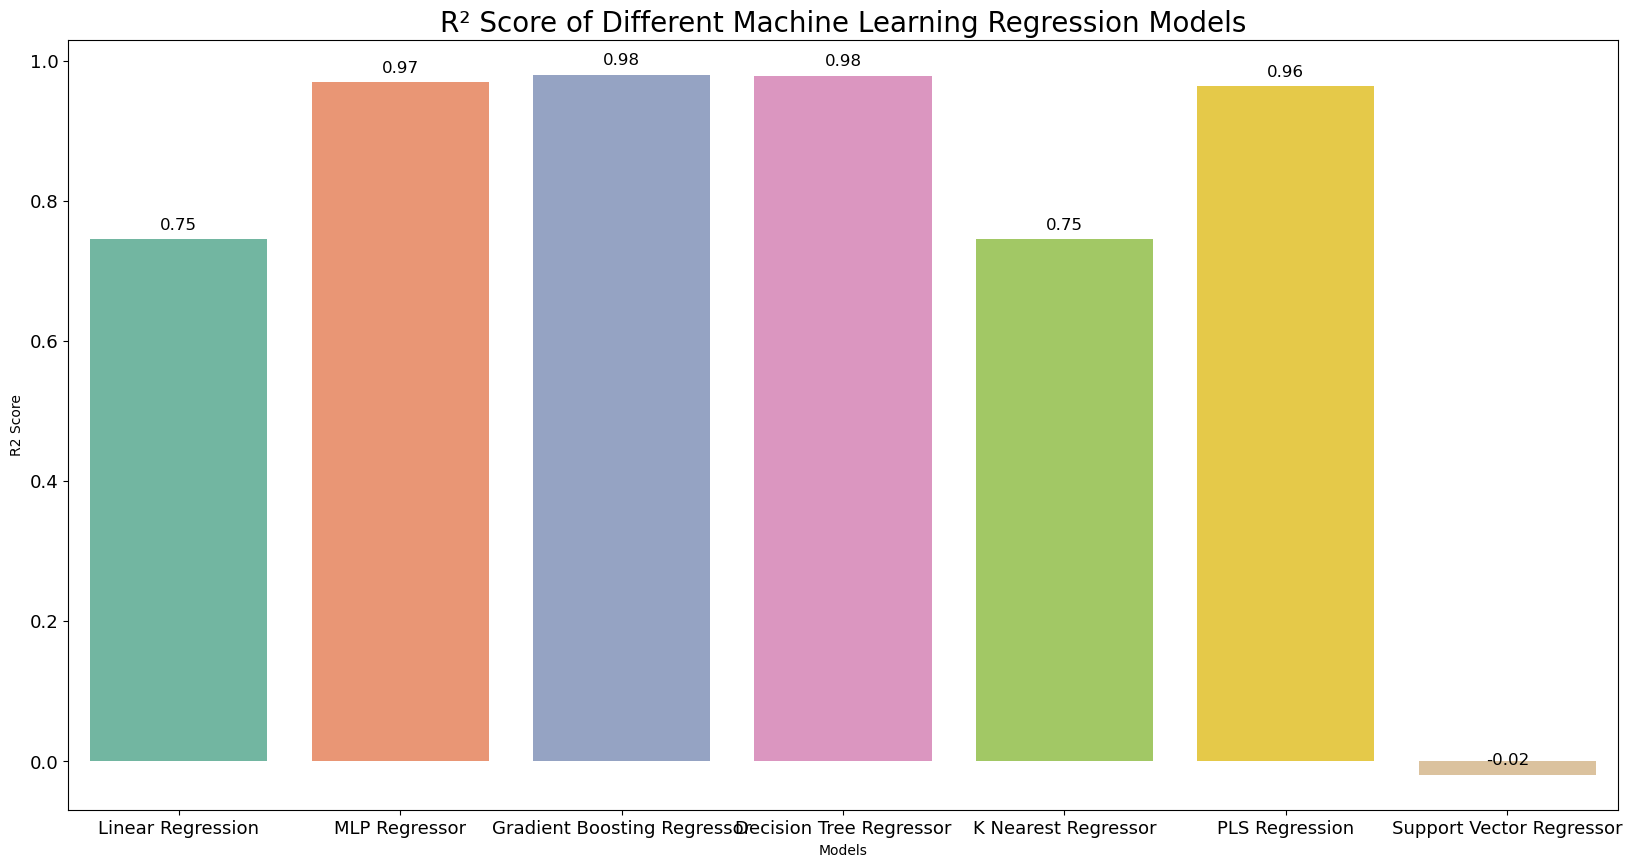

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=model_dataframe, x='Models', y='R2 Score', palette='Set2', ax=ax)

for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01, f'{height:.2f}', 
            ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title("R² Score of Different Machine Learning Regression Models", fontsize=20)

plt.show()

### The graph shows that the Decision Tree Regressor and Gradient Boosting Regressor achieved the highest R² value of 0.98, indicating excellent predictive accuracy. The MLP Regressor closely follows with an R² of 0.97, and the PLS Regressor also performs well with an R² of 0.96. These results suggest that these four models provide strong predictive capabilities and are suitable for deployment, with the Decision Tree and Gradient Boosting Regressors offering the best performance overall.

## Conclusion
Different machine learning models yield varying mean absolute and mean squared error values, emphasizing the need for careful model evaluation based on predictive accuracy.

To prepare the dataset, categorical variables must be encoded into numerical formats, as most machine learning algorithms cannot process non-numeric input.

Additionally, randomly shuffling the dataset prior to the train-test split ensures that the training set captures a representative distribution, improving the model’s generalization to unseen data.

It is also critical to address any missing data through appropriate imputation or removal strategies, as incomplete inputs can compromise model training and performance.

## Recommendation
#### Although some outliers remain in the dataset, it is recommended to perform a thorough outlier detection and removal process. Outliers can negatively impact model accuracy by skewing predictions and increasing error values. Removing or treating these outliers in future iterations may lead to improved model performance and more reliable results.
